<a href="https://colab.research.google.com/github/Mohammad-H-Zahrawi/Challenges-Kaggle/blob/main/House%20price%20prediction/House_Price_Prediction_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
train_data.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   142          20       RL         78.0    11645   Pave   NaN      Reg   
1   365          60       RL          NaN    18800   Pave   NaN      IR1   
2   799          60       RL        104.0    13518   Pave   NaN      Reg   
3   976         160       FV          NaN     2651   Pave   NaN      Reg   
4  1158         120       RL         34.0     5001   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      1   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      7   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      7   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      4   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      7   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2006        WD         Normal     260000  
1   2006        WD         Normal     190000  
2   2009       New        Partial     485000  
3   2006        WD         Normal     165000  
4   2009        WD         Normal     230000  

[5 rows x 81 columns]

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934 entries, 0 to 933
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             934 non-null    int64  
 1   MSSubClass     934 non-null    int64  
 2   MSZoning       934 non-null    object 
 3   LotFrontage    771 non-null    float64
 4   LotArea        934 non-null    int64  
 5   Street         934 non-null    object 
 6   Alley          56 non-null     object 
 7   LotShape       934 non-null    object 
 8   LandContour    934 non-null    object 
 9   Utilities      934 non-null    object 
 10  LotConfig      934 non-null    object 
 11  LandSlope      934 non-null    object 
 12  Neighborhood   934 non-null    object 
 13  Condition1     934 non-null    object 
 14  Condition2     934 non-null    object 
 15  BldgType       934 non-null    object 
 16  HouseStyle     934 non-null    object 
 17  OverallQual    934 non-null    int64  
 18  OverallCon

In [ ]:
train_data.describe(include='all')

Id  MSSubClass MSZoning  LotFrontage        LotArea Street  \
count    934.000000  934.000000      934   771.000000     934.000000    934   
unique          NaN         NaN        5          NaN            NaN      2   
top             NaN         NaN       RL          NaN            NaN   Pave   
freq            NaN         NaN      740          NaN            NaN    930   
mean     720.086724   57.692719      NaN    69.584955   10456.070664    NaN   
std      425.245539   43.581647      NaN    22.718869   10533.263205    NaN   
min        1.000000   20.000000      NaN    21.000000    1300.000000    NaN   
25%      353.250000   20.000000      NaN    59.000000    7500.000000    NaN   
50%      705.500000   50.000000      NaN    70.000000    9552.000000    NaN   
75%     1101.500000   70.000000      NaN    80.000000   11644.500000    NaN   
max     1459.000000  190.000000      NaN   182.000000  215245.000000    NaN   

       Alley LotShape LandContour Utilities  ...    PoolArea PoolQC  Fence  \
count     56      934         934       934  ...  934.000000      3    179   
unique     2        4           4         1  ...         NaN      2      4   
top     Grvl      Reg         Lvl    AllPub  ...         NaN     Ex  MnPrv   
freq      29      579         849       934  ...         NaN      2     91   
mean     NaN      NaN         NaN       NaN  ...    1.932548    NaN    NaN   
std      NaN      NaN         NaN       NaN  ...   34.512758    NaN    NaN   
min      NaN      NaN         NaN       NaN  ...    0.000000    NaN    NaN   
25%      NaN      NaN         NaN       NaN  ...    0.000000    NaN    NaN   
50%      NaN      NaN         NaN       NaN  ...    0.000000    NaN    NaN   
75%      NaN      NaN         NaN       NaN  ...    0.000000    NaN    NaN   
max      NaN      NaN         NaN       NaN  ...  738.000000    NaN    NaN   

       MiscFeature       MiscVal      MoSold       YrSold  SaleType  \
count           36    934.000000  934.000000   934.000000       934   
unique           3           NaN         NaN          NaN         9   
top           Shed           NaN         NaN          NaN        WD   
freq            32           NaN         NaN          NaN       815   
mean           NaN     53.276231    6.332976  2007.814775       NaN   
std            NaN    606.248612    2.711067     1.334253       NaN   
min            NaN      0.000000    1.000000  2006.000000       NaN   
25%            NaN      0.000000    5.000000  2007.000000       NaN   
50%            NaN      0.000000    6.000000  2008.000000       NaN   
75%            NaN      0.000000    8.000000  2009.000000       NaN   
max            NaN  15500.000000   12.000000  2010.000000       NaN   

        SaleCondition      SalePrice  
count             934     934.000000  
unique              6            NaN  
top            Normal            NaN  
freq              774            NaN  
mean              NaN  182981.457173  
std               NaN   80613.726628  
min               NaN   34900.000000  
25%               NaN  132000.000000  
50%               NaN  165075.000000  
75%               NaN  215000.000000  
max               NaN  755000.000000  

[11 rows x 81 columns]

In [ ]:
train_data.duplicated().sum()

0

## EDA

In [ ]:
#sns.pairplot(train_data)
#plt.show()

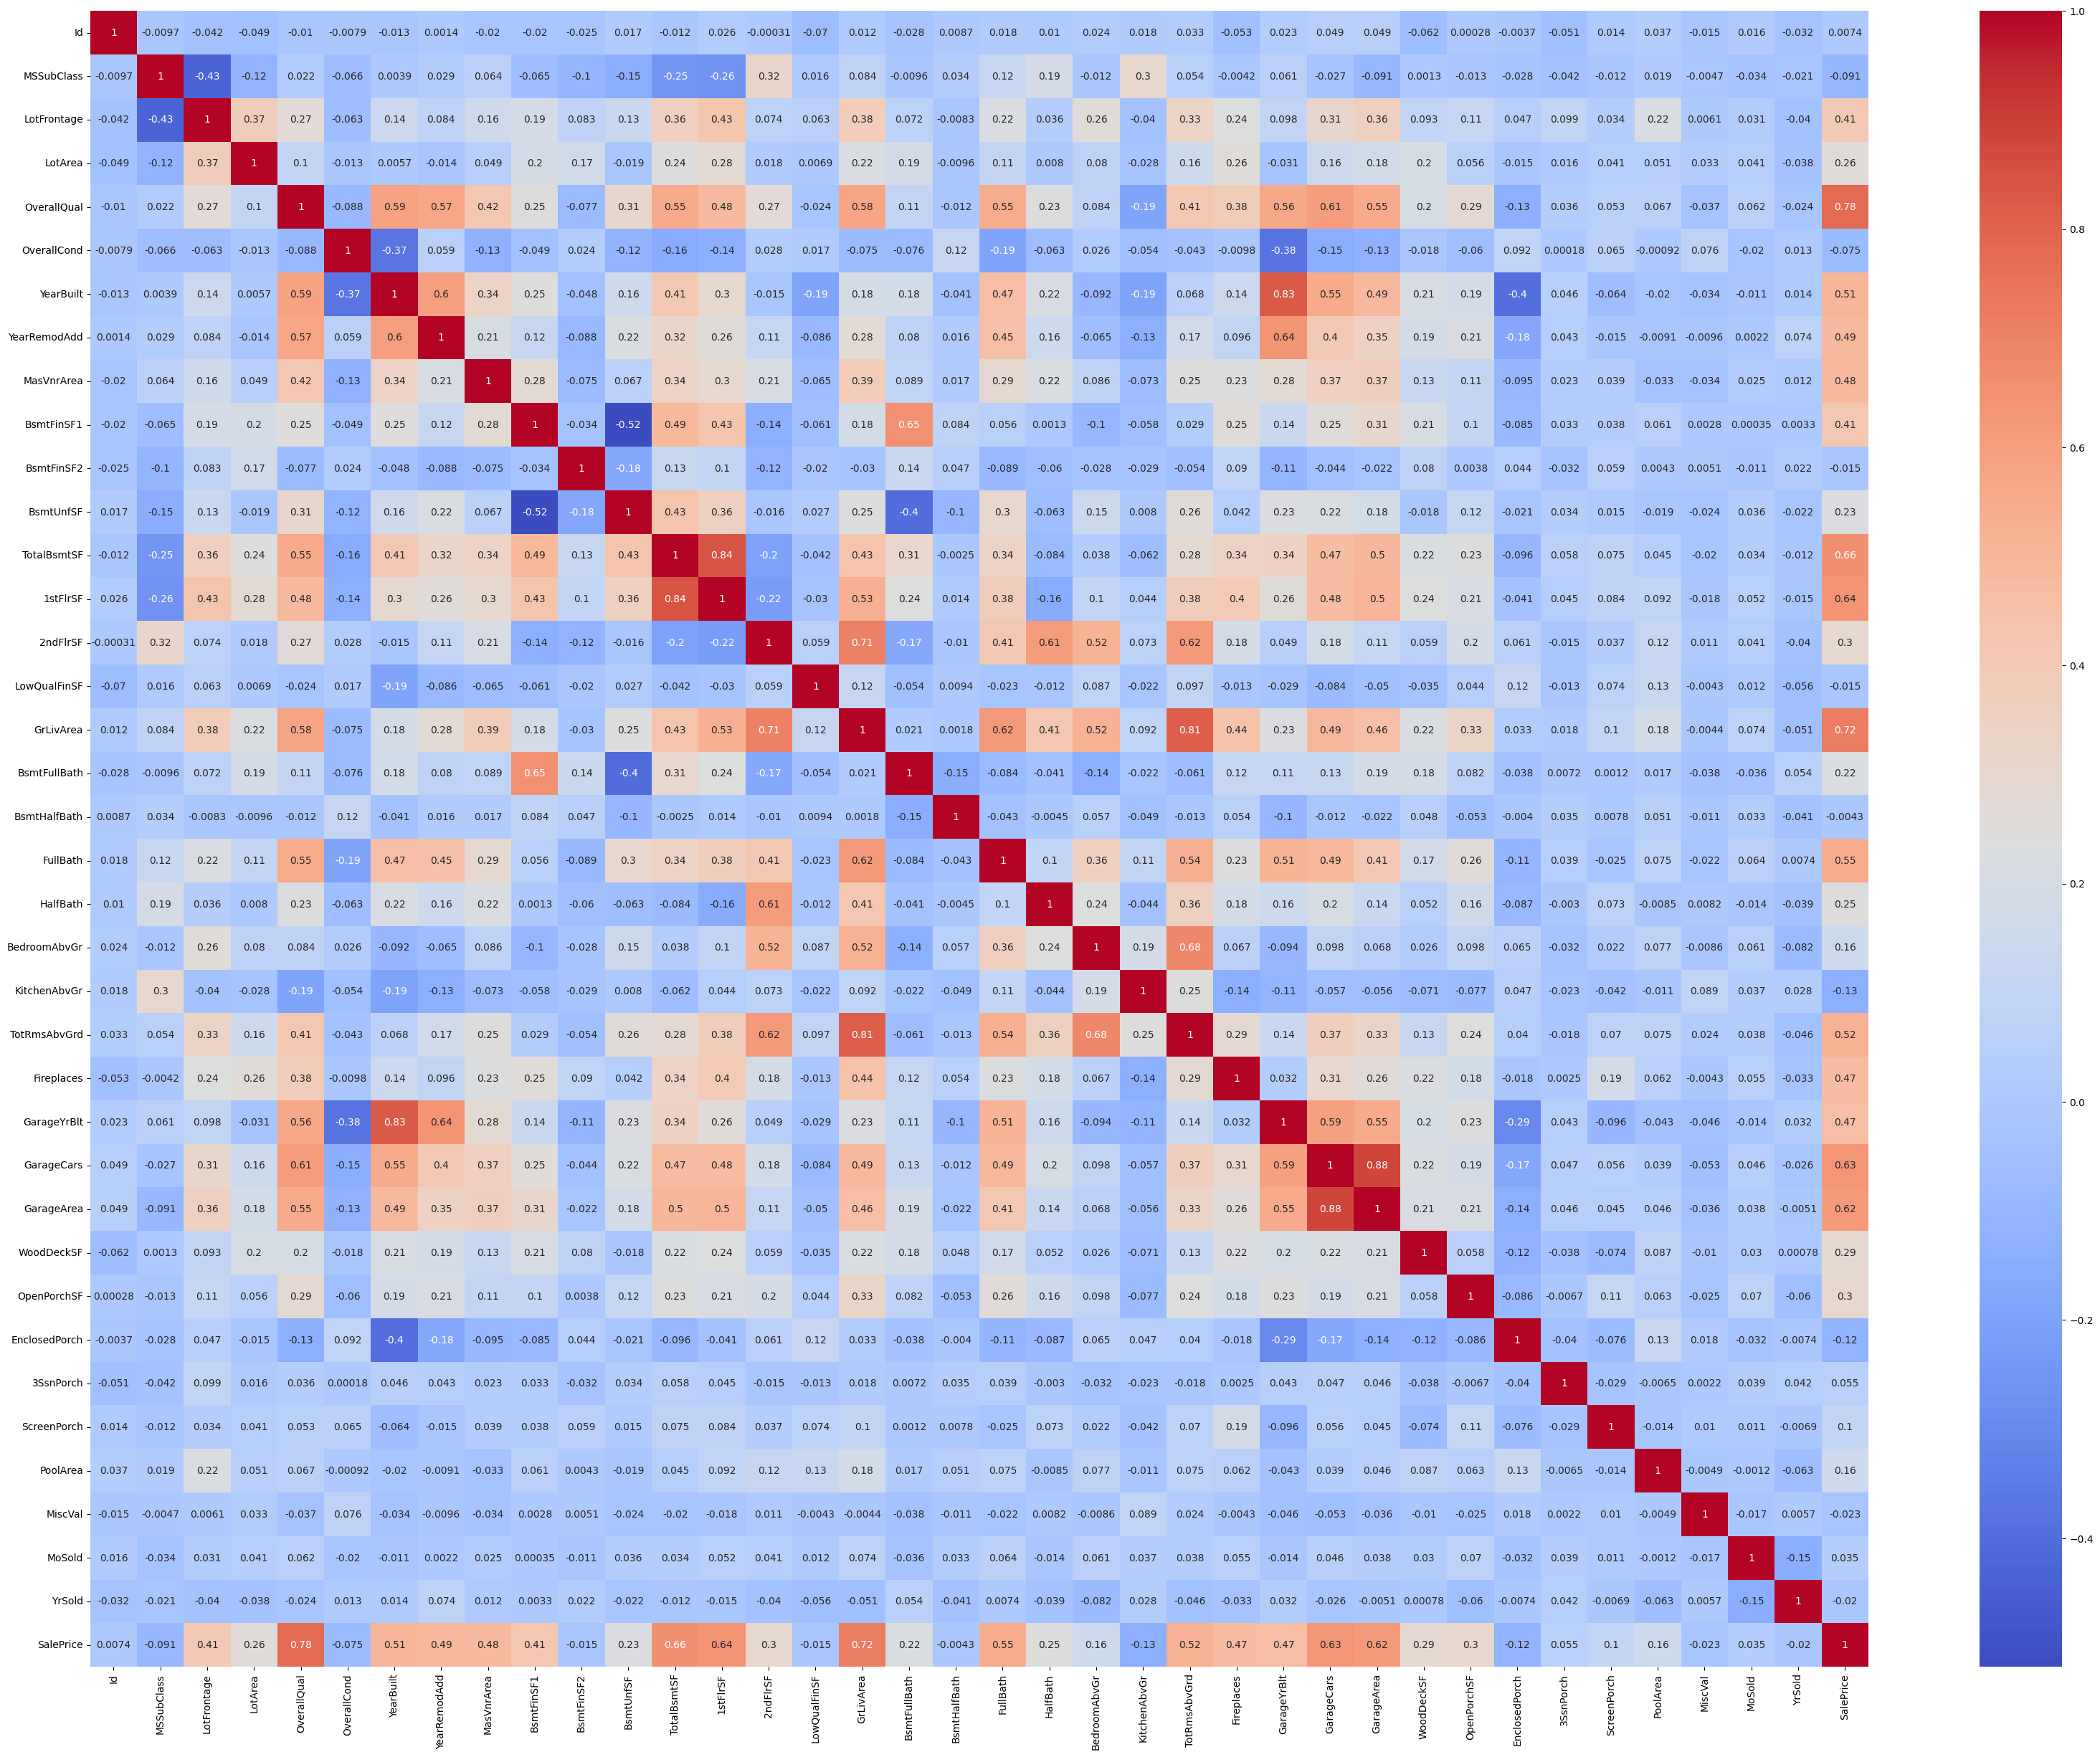

In [ ]:
plt.figure(figsize = (40,30))
sns.heatmap(train_data.select_dtypes('number').corr(), annot=True,cmap="coolwarm")
plt.show()

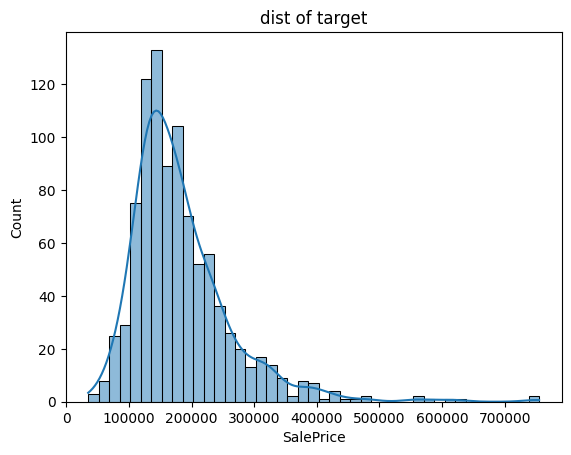

In [ ]:
sns.histplot(train_data['SalePrice'], kde=True)
plt.title('dist of target')
plt.show()

In [ ]:
'''
60  GarageFinish #c
61  GarageCars
62  GarageArea
63  GarageQual   #c   drop or drop GarageCond very similer
64  GarageCond   #c
65  PavedDrive   #c
66  WoodDeckSF
67  OpenPorchSF
68  EnclosedPorch
69  3SsnPorch
70  ScreenPorch
71  PoolArea
72  PoolQC       #c   931 null -> drop
73  Fence        #c   755 null -> drop
74  MiscFeature  #c   898 null -> drop
75  MiscVal
76  MoSold
77  YrSold
78  SaleType      #c
79  SaleCondition #c
80  SalePrice


'''

'\n60  GarageFinish #c\n61  GarageCars   \n62  GarageArea   \n63  GarageQual   #c   drop or drop GarageCond very similer\n64  GarageCond   #c       \n65  PavedDrive   #c\n66  WoodDeckSF   \n67  OpenPorchSF  \n68  EnclosedPorch\n69  3SsnPorch    \n70  ScreenPorch  \n71  PoolArea     \n72  PoolQC       #c   931 null -> drop\n73  Fence        #c   755 null -> drop\n74  MiscFeature  #c   898 null -> drop\n75  MiscVal      \n76  MoSold       \n77  YrSold       \n78  SaleType      #c\n79  SaleCondition #c\n80  SalePrice    \t\n\n\n'

In [ ]:
# create new feature that represent the area of all porch in square feet and the Wood Deck its the same concept of the porch
# bc all of them alone have alot of 0 square feet data

train_data['allporchsf'] = train_data['OpenPorchSF'] + train_data['3SsnPorch'] + train_data['EnclosedPorch'] + train_data['ScreenPorch'] + train_data['WoodDeckSF']

In [ ]:
# create new feature age of the house
# i think its give more info than the year of build and sold

train_data['age'] = train_data['YrSold'] - train_data['YearBuilt']

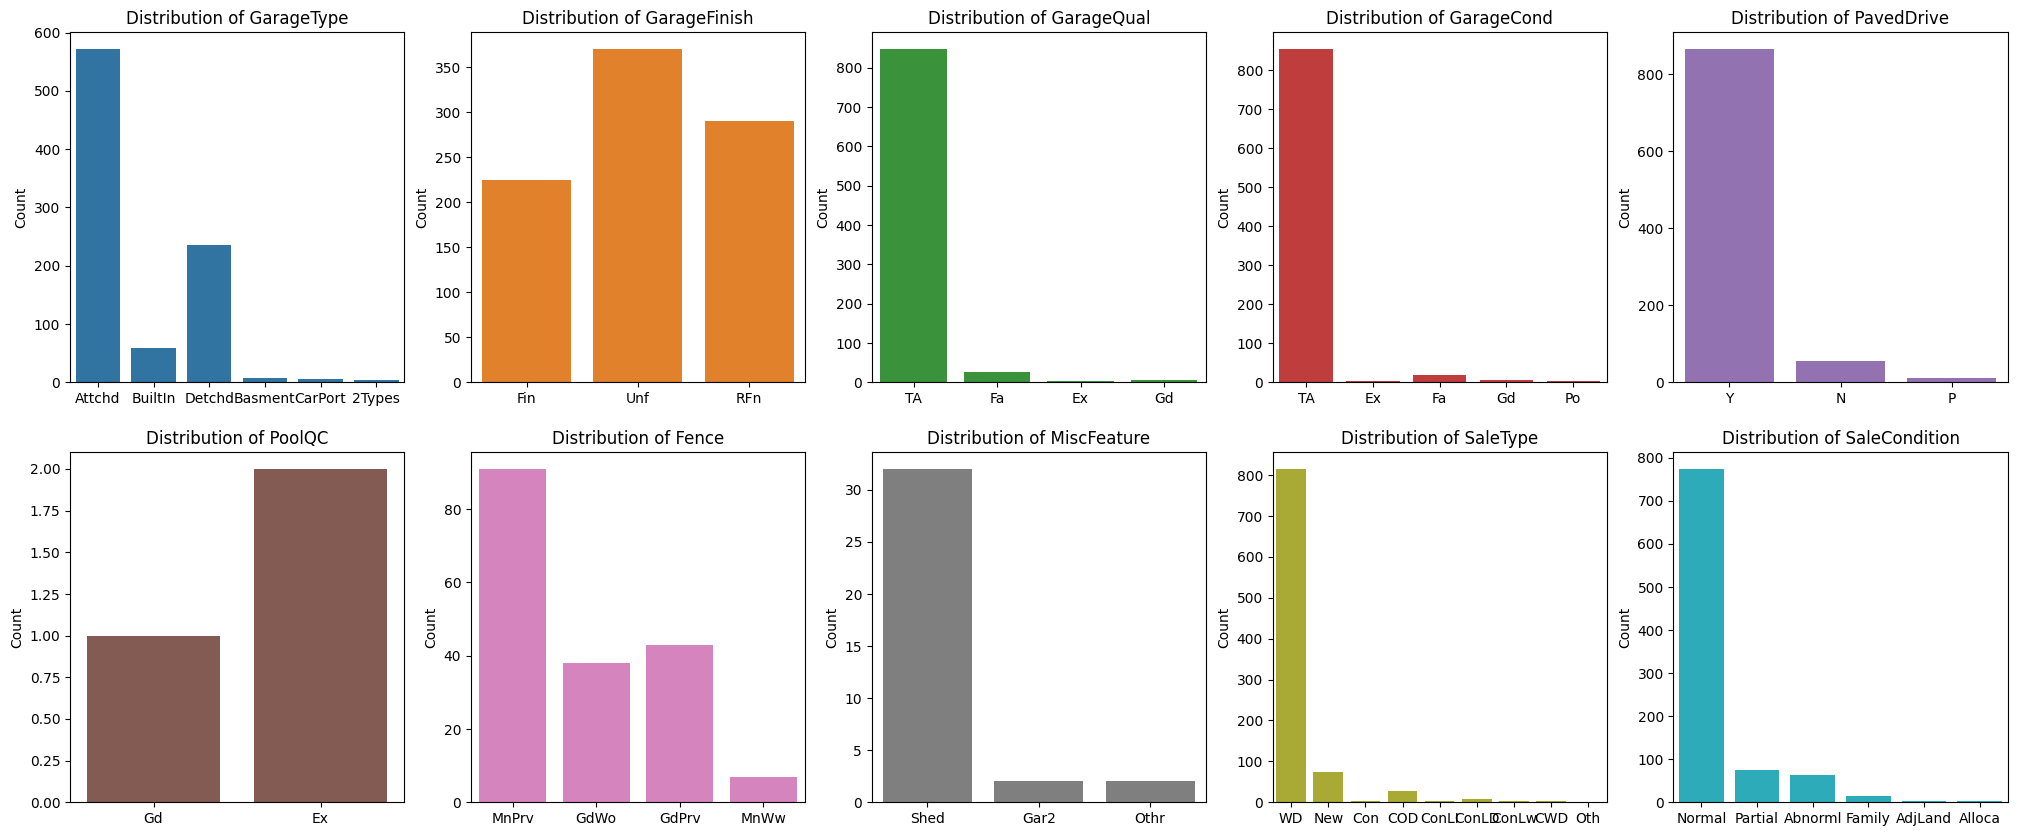

In [ ]:
# countplots for the categorical columns

categorical_columns = ['GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition']

x_cat = 2
y_cat = 5

fig, ax = plt.subplots(x_cat, y_cat, figsize=(25, 10))

colors_cat = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b',
           '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

for i in range(x_cat):
    for j in range(y_cat):
        column = categorical_columns[i*y_cat + j]
        sns.countplot(x=column, data=train_data, ax=ax[i, j], color=colors_cat[i*y_cat + j])
        ax[i, j].set_title(f'Distribution of {column}')
        ax[i, j].set_xlabel('')
        ax[i, j].set_ylabel('Count')

plt.show()


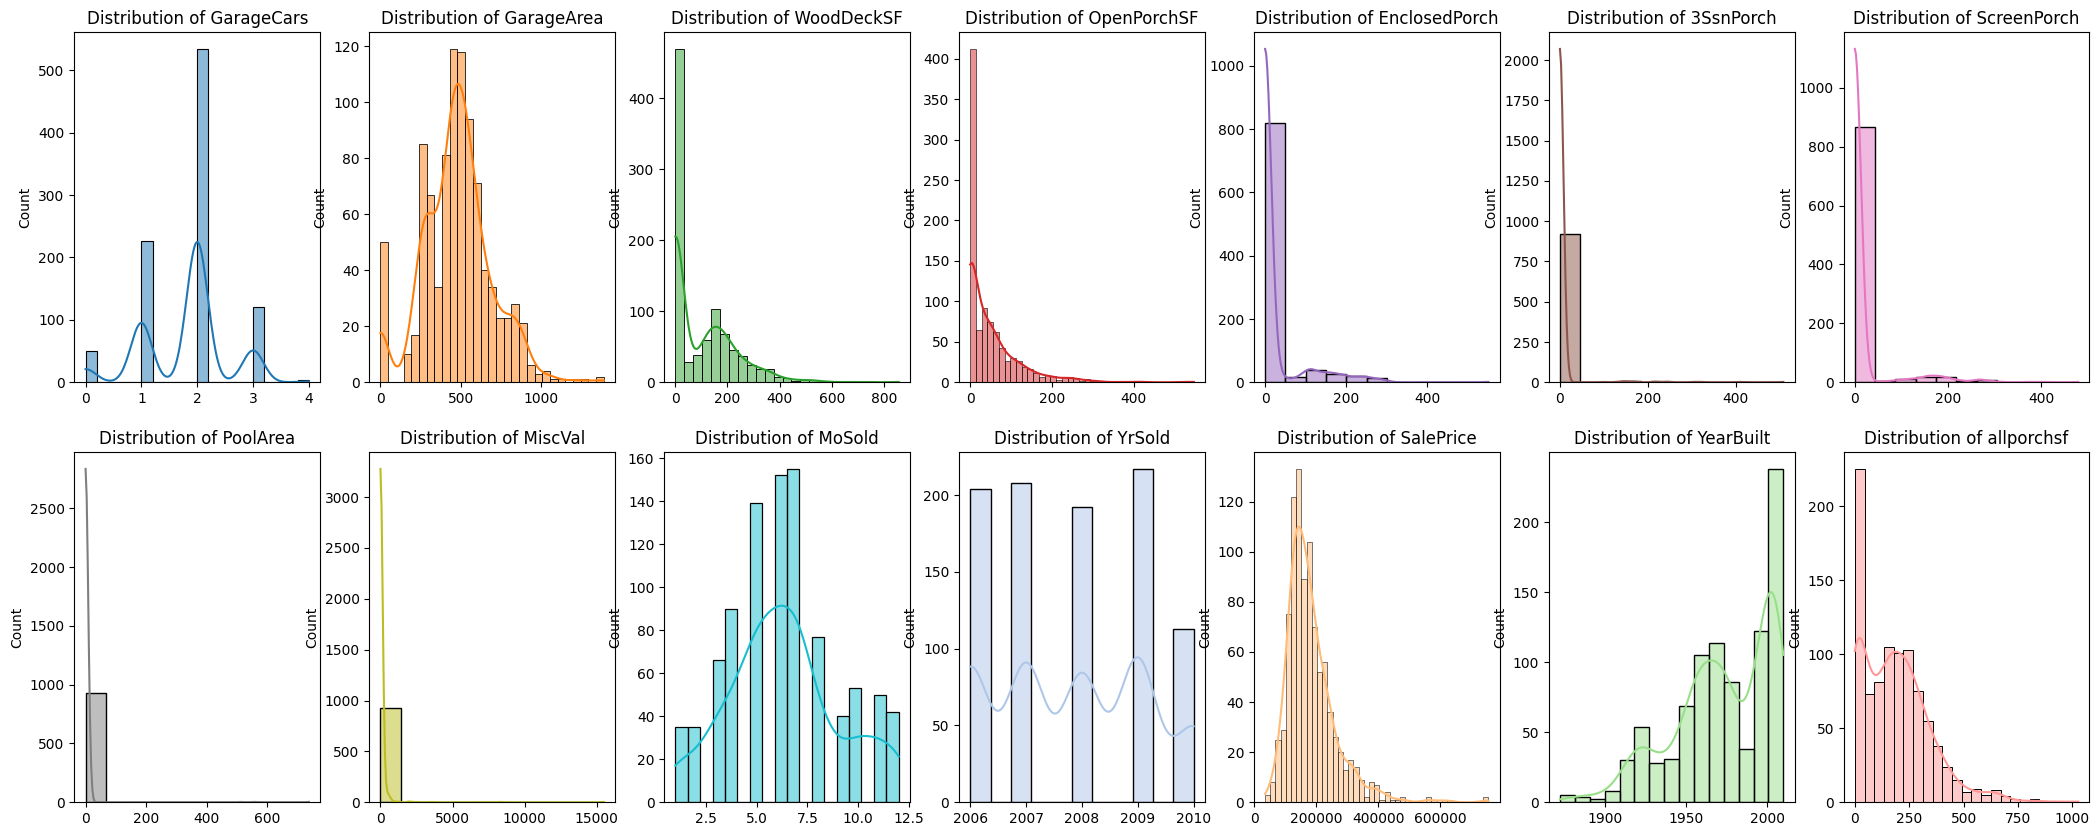

In [ ]:
# histplots for the numerical columns

numerical_columns = ['GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
                     'ScreenPorch','PoolArea','MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'YearBuilt', 'allporchsf']

x = 2
y = 7

fig, ax = plt.subplots(x, y, figsize=(26, 10))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b',
           '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#aec7e8', '#ffbb78', '#98df8a', '#ff9896']


for i in range(x):
    for j in range(y):
        column = numerical_columns[i*y + j]
        sns.histplot(x=column, data=train_data, ax=ax[i, j], color=colors[i*y + j], kde=True)
        ax[i, j].set_title(f'Distribution of {column}')
        ax[i, j].set_xlabel('')
        ax[i, j].set_ylabel('Count')

plt.show()

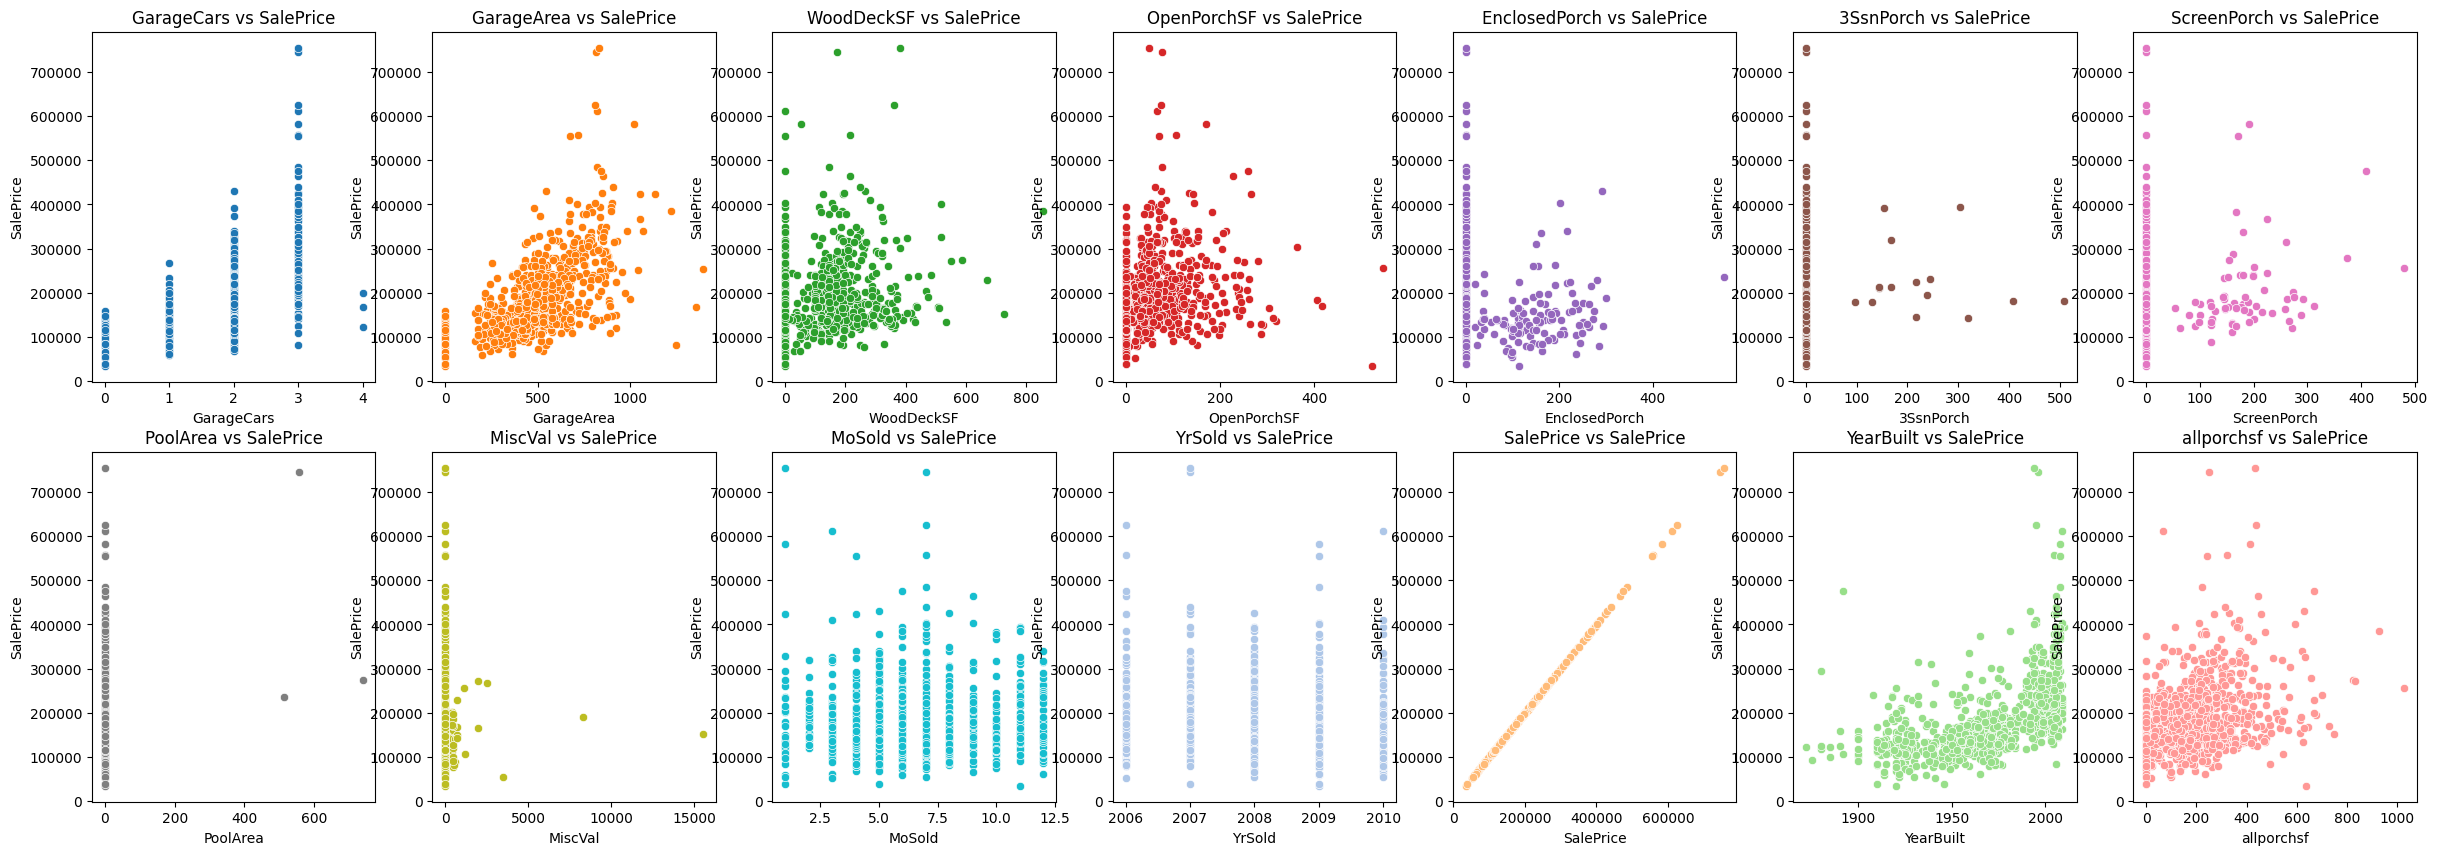

In [ ]:
# Bivariate analysis numerical columns vs target


fig, ax = plt.subplots(x, y, figsize=(30, 10))


for i in range(x):
    for j in range(y):
        column = numerical_columns[i*y + j]

        sns.scatterplot(x=column,y='SalePrice', data=train_data, ax=ax[i, j], color=colors[i*y + j])

        ax[i, j].set_title(f'{column} vs SalePrice')
        ax[i, j].set_xlabel(column)
        ax[i, j].set_ylabel('SalePrice')

plt.show()

## Tabark and Maryam EDA

In [ ]:
# List of numerical columns
numerical_columns = ['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']

# Fill missing values in numerical columns using mean
for column in numerical_columns:
    train_data[column].fillna(train_data[column].mean(), inplace=True)

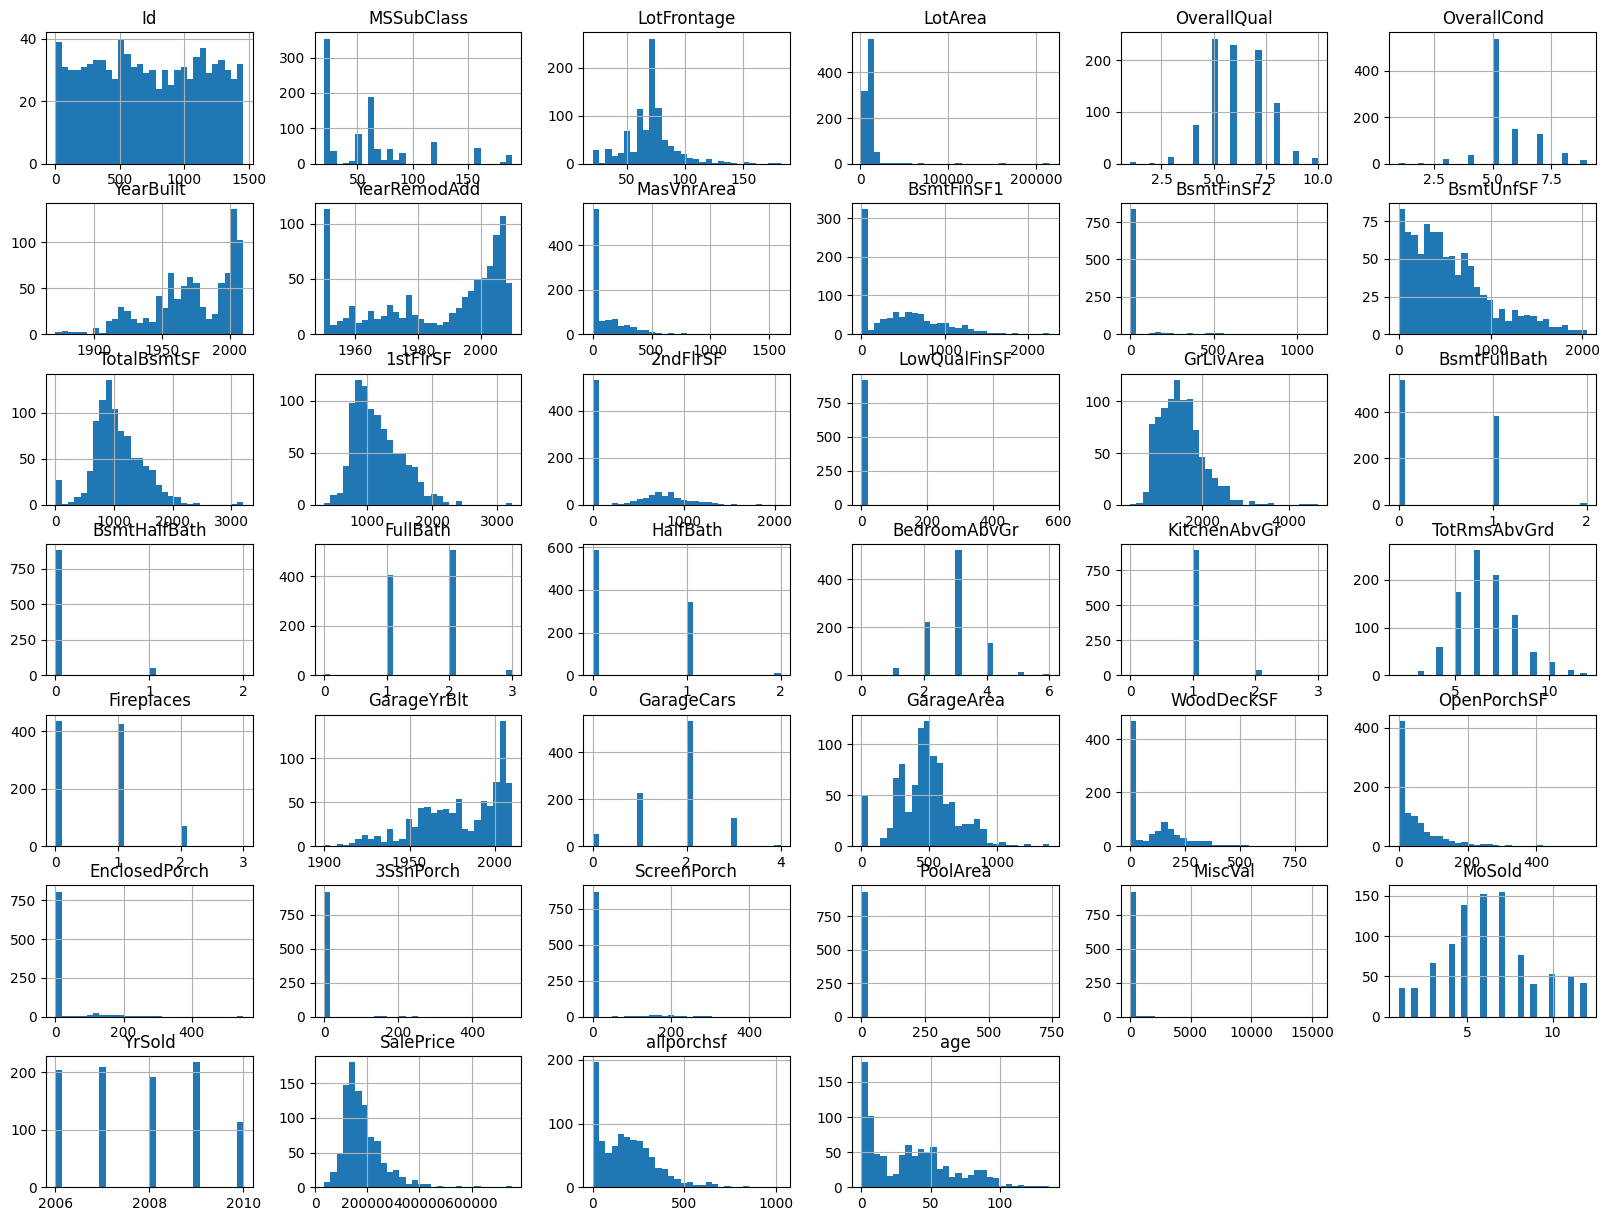

In [ ]:
import matplotlib.pyplot as plt


numerical_features = train_data.select_dtypes(include=['int64', 'float64']).columns
train_data[numerical_features].hist(bins=30, figsize=(20, 15))
plt.show()

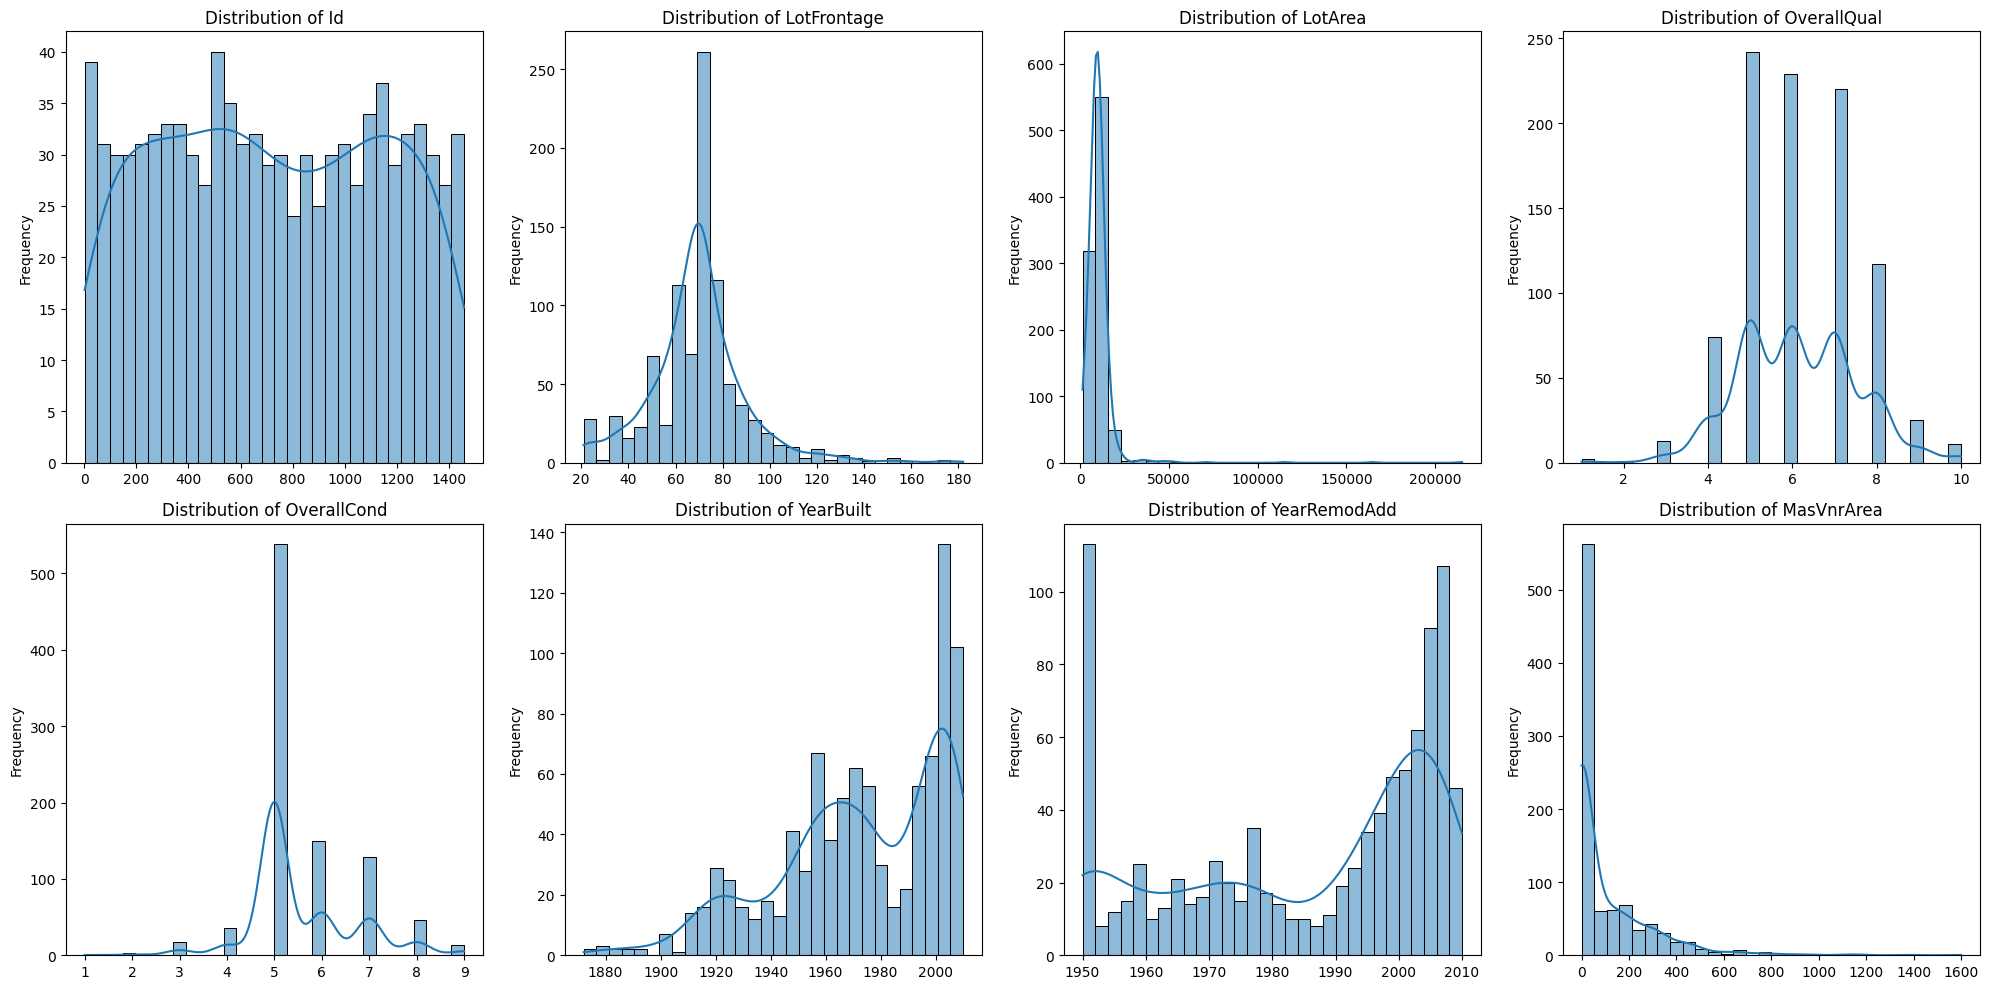

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Numerical columns
numerical_columns = ['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea']

# Number of rows and columns for the subplot grid
x_num = 2
y_num = 4

# Create a figure and axes
fig, ax = plt.subplots(x_num, y_num, figsize=(20, 10))

# Plot histograms for each numerical feature
for i in range(x_num):
    for j in range(y_num):
        column = numerical_columns[i * y_num + j]
        sns.histplot(train_data[column], kde=True, ax=ax[i, j], bins=30)
        ax[i, j].set_title(f'Distribution of {column}')
        ax[i, j].set_xlabel('')
        ax[i, j].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# List of categorical columns
categorical_columns = [
    'MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
    'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
    'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual',
    'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
    'BsmtFinType2', 'Heating', 'HeatingQC'
]

# Fill missing values in categorical columns using mode
for column in categorical_columns:
   train_data[column].fillna(train_data[column].mode()[0], inplace=True)



<ipython-input-34-2e818b7ed86f>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=train_data, ax=ax[i, j], palette='Set2')
<ipython-input-34-2e818b7ed86f>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=train_data, ax=ax[i, j], palette='Set2')
<ipython-input-34-2e818b7ed86f>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=train_data, ax=ax[i, j], palette='Set2')
<ipython-input-34-2e818b7ed86f>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remove

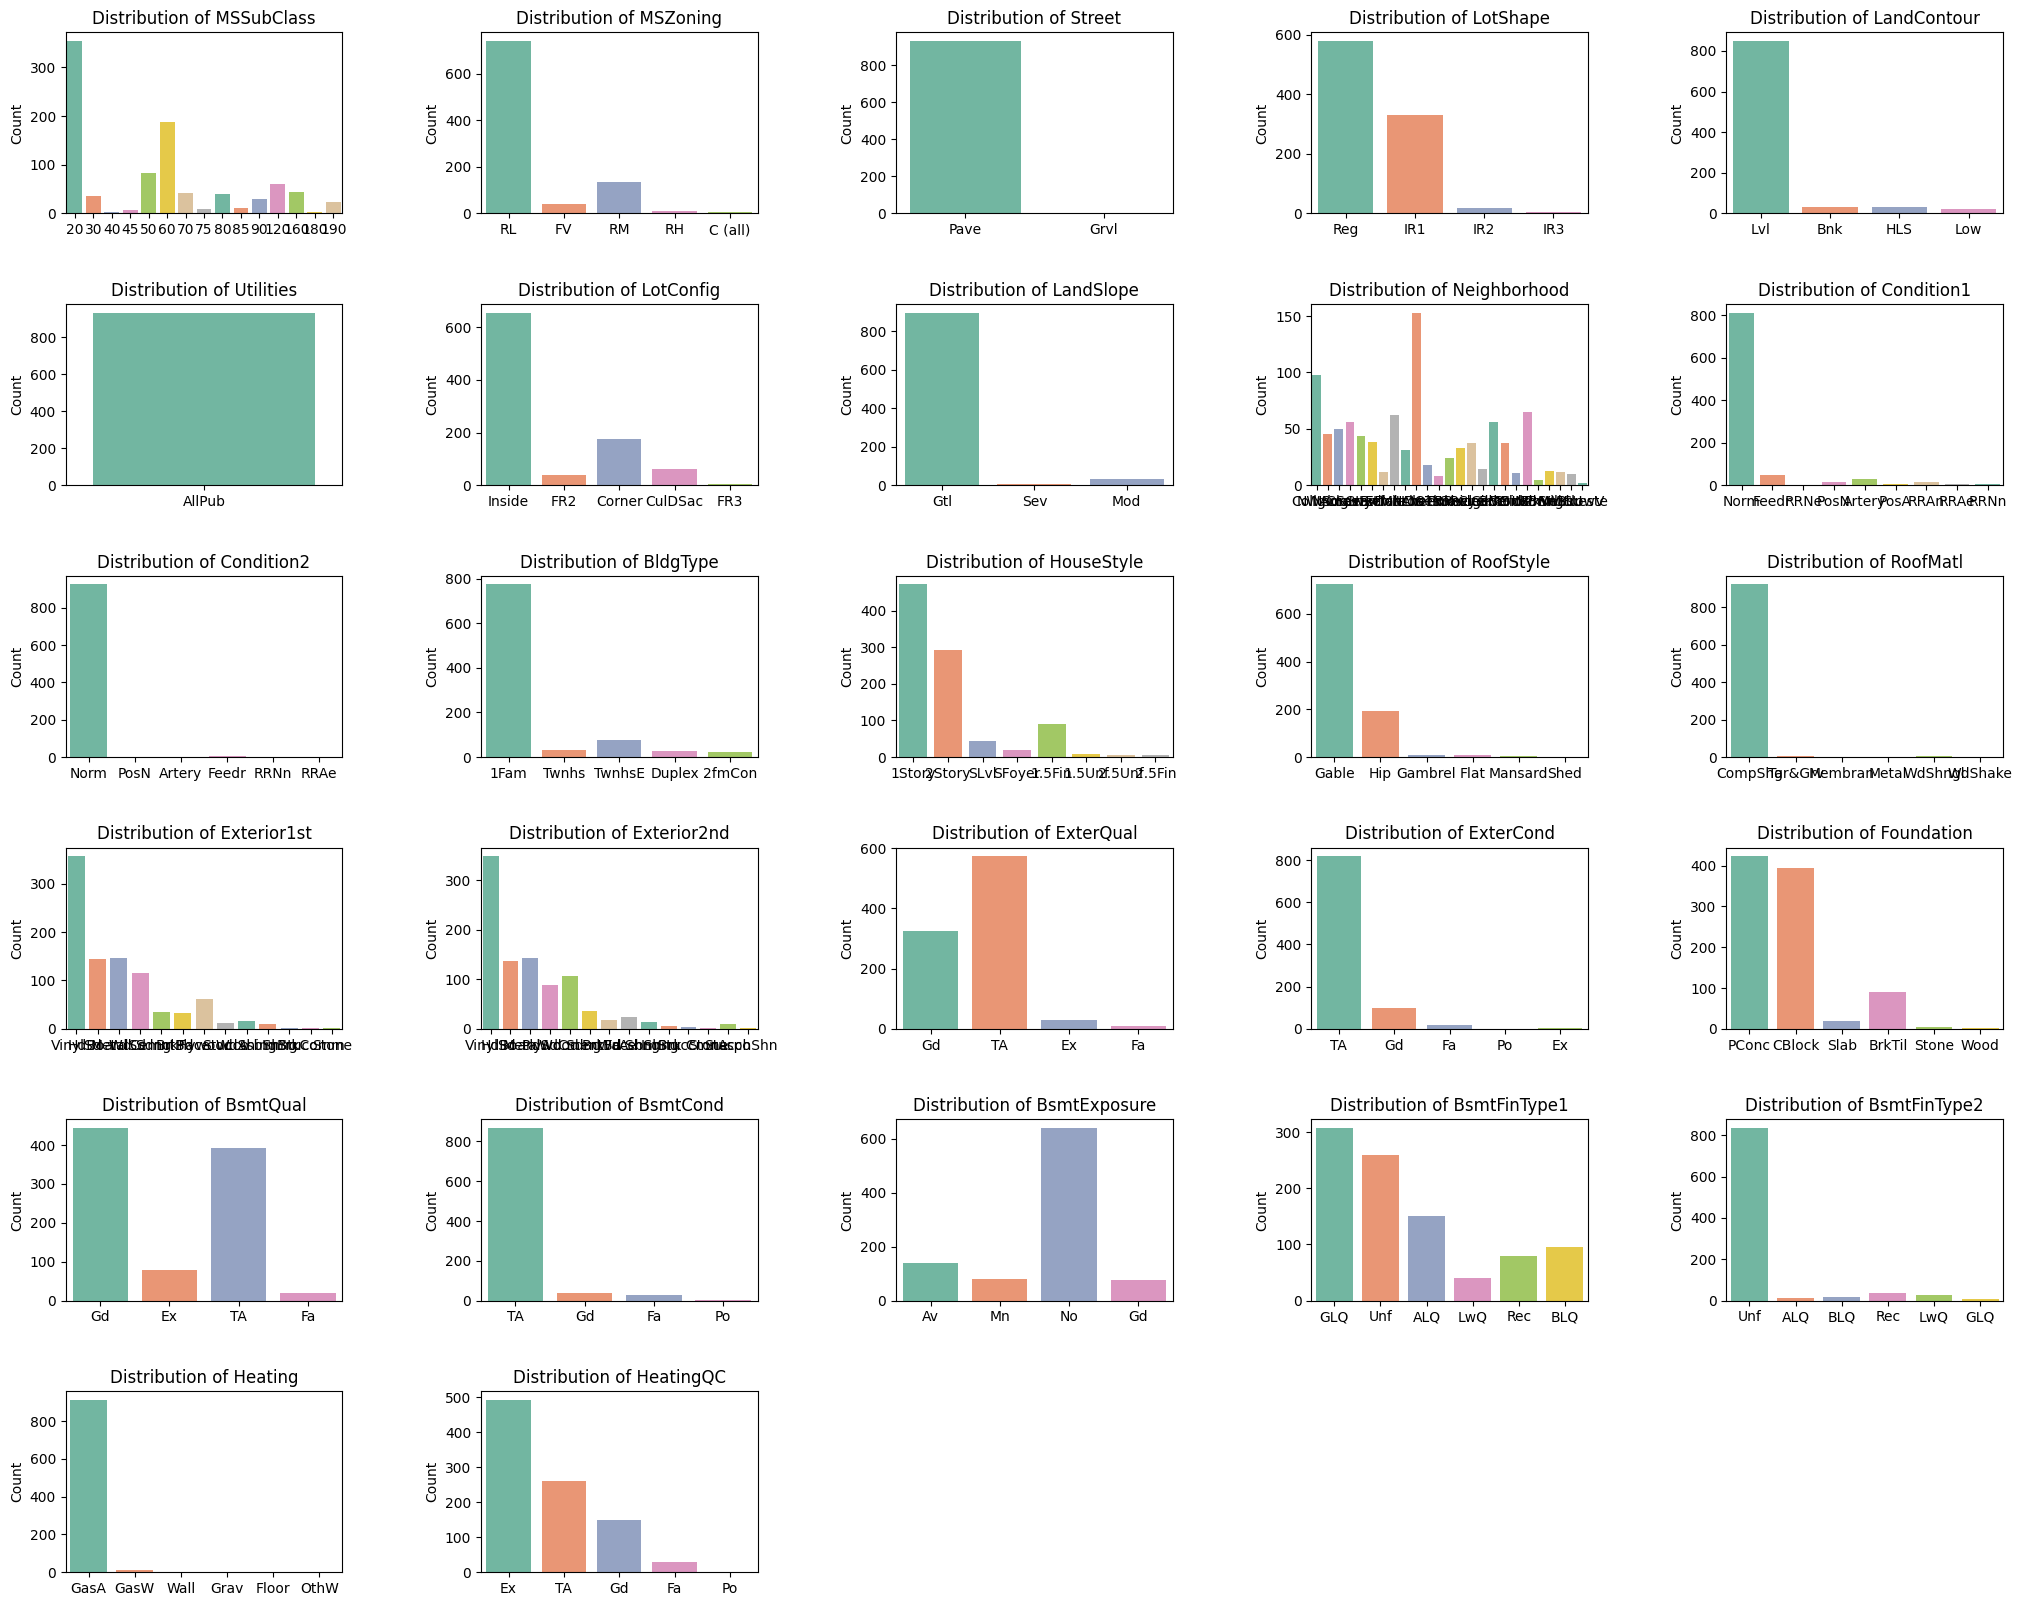

In [ ]:
# Number of rows and columns for the subplot grid
x_cat = 6
y_cat = 5

# Create a figure and axes
fig, ax = plt.subplots(x_cat, y_cat, figsize=(25, 20))

# Adjust the spacing between plots
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Plot count plots for each categorical feature
for i in range(x_cat):
    for j in range(y_cat):
        index = i * y_cat + j
        if index < len(categorical_columns):
            column = categorical_columns[index]
            sns.countplot(x=column, data=train_data, ax=ax[i, j], palette='Set2')
            ax[i, j].set_title(f'Distribution of {column}')
            ax[i, j].set_xlabel('')
            ax[i, j].set_ylabel('Count')
        else:
            fig.delaxes(ax[i, j])

plt.show()

In [ ]:
numerical_features = train_data.select_dtypes(include=['int64', 'float64'])


corr = numerical_features.corr()

print(corr)

                     Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000   -0.009653    -0.038370 -0.048891    -0.010387   
MSSubClass    -0.009653    1.000000    -0.399401 -0.119524     0.021827   
LotFrontage   -0.038370   -0.399401     1.000000  0.294350     0.248655   
LotArea       -0.048891   -0.119524     0.294350  1.000000     0.103228   
OverallQual   -0.010387    0.021827     0.248655  0.103228     1.000000   
OverallCond   -0.007910   -0.066452    -0.055679 -0.012710    -0.088318   
YearBuilt     -0.012688    0.003874     0.137421  0.005663     0.586813   
YearRemodAdd   0.001412    0.029390     0.078133 -0.013972     0.568958   
MasVnrArea    -0.020406    0.064327     0.150894  0.049377     0.414973   
BsmtFinSF1    -0.020281   -0.065004     0.177082  0.196452     0.250645   
BsmtFinSF2    -0.024716   -0.103341     0.071147  0.173343    -0.076642   
BsmtUnfSF      0.016591   -0.146704     0.125106 -0.018754     0.310083   
TotalBsmtSF   -0.012431  

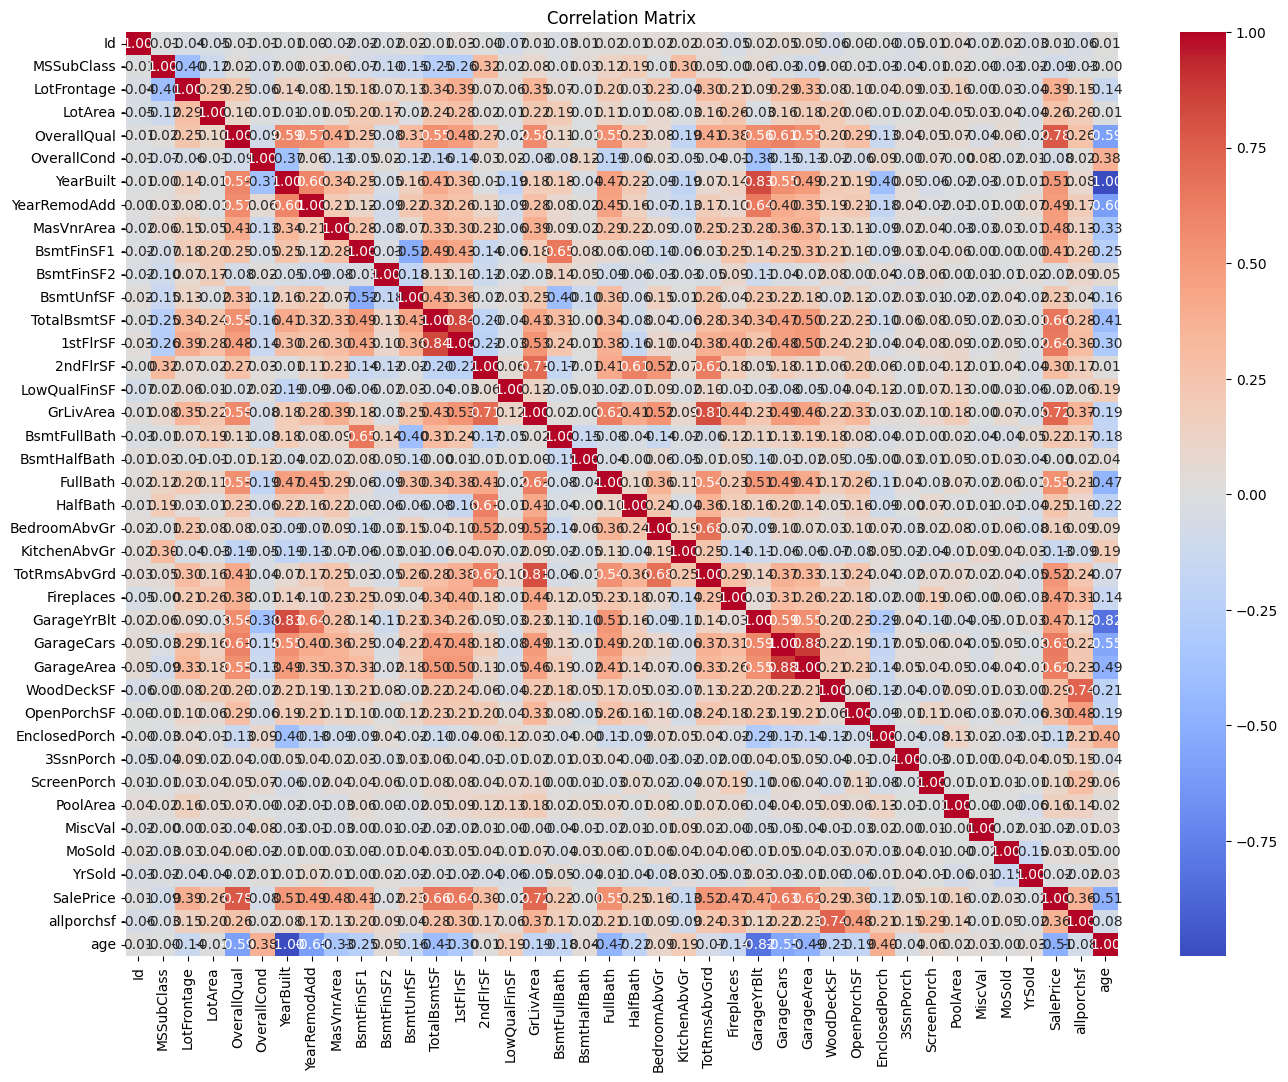

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Identify numerical columns
numerical_cols = train_data.select_dtypes(include=['int64', 'float64']).columns
numerical_cols

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'allporchsf', 'age'],
      dtype='object')

### outliers

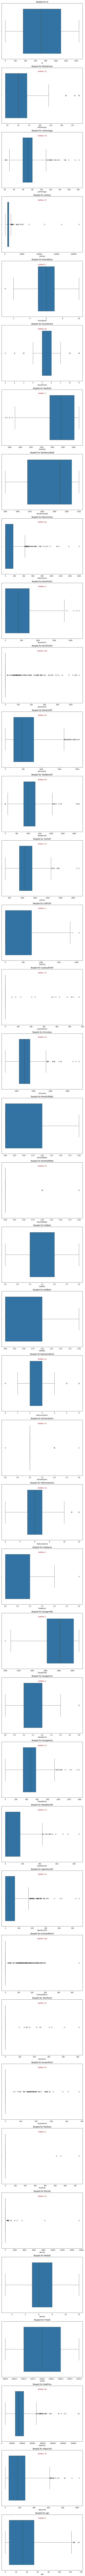

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate outliers for each column except "id"
outliers_dict = {}
for column in train_data.columns:
    if column != "id" and train_data[column].dtype != object:  # Make sure the column is not categorical
        Q1 = train_data[column].quantile(0.25)
        Q3 = train_data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = train_data[(train_data[column] < lower_bound) | (train_data[column] > upper_bound)][column]
        outliers_dict[column] = outliers

# Create multiple boxplots side by side with a smaller size
fig, axs = plt.subplots(len(outliers_dict), figsize=(8, 6 * len(outliers_dict)))

# Display the data using Boxplot and organize them side by side excluding "id"
for i, (column, outliers) in enumerate(outliers_dict.items()):
    sns.boxplot(x=column, data=train_data, ax=axs[i])
    axs[i].set_title("Boxplot for " + column)
    if not outliers.empty:
        axs[i].text(0.5, 0.95, f"Outliers: {len(outliers)}", horizontalalignment='center', verticalalignment='top', transform=axs[i].transAxes, fontsize=10, color='red')

plt.tight_layout()
plt.show()


In [ ]:
# create new date
new_date = train_data.copy()
new_date.shape

(934, 83)

In [ ]:
# count the null values

columns = numerical_columns + categorical_columns

missing_values = new_date[columns].isnull().sum().sort_values(ascending=False)

print(missing_values)

PoolQC           931
MiscFeature      898
Fence            755
GarageCond        50
GarageQual        50
GarageFinish      50
GarageType        50
GarageCars         0
GarageArea         0
SaleType           0
PavedDrive         0
allporchsf         0
YearBuilt          0
SalePrice          0
YrSold             0
MoSold             0
MiscVal            0
PoolArea           0
ScreenPorch        0
3SsnPorch          0
EnclosedPorch      0
OpenPorchSF        0
WoodDeckSF         0
SaleCondition      0
dtype: int64


In [ ]:
# fill none with the mean for numerical

new_date[numerical_columns] = new_date[numerical_columns].fillna(new_date[numerical_columns].mean())

# fill null with the mean for categorical

for column in categorical_columns:
    new_date[column] = new_date[column].fillna(new_date[column].mode()[0])

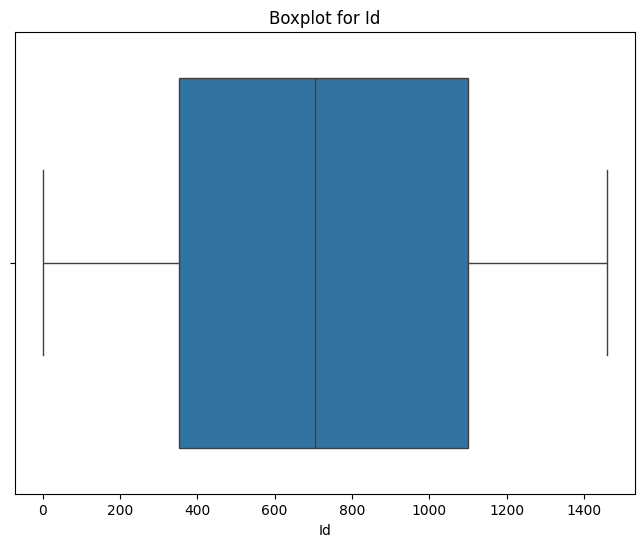

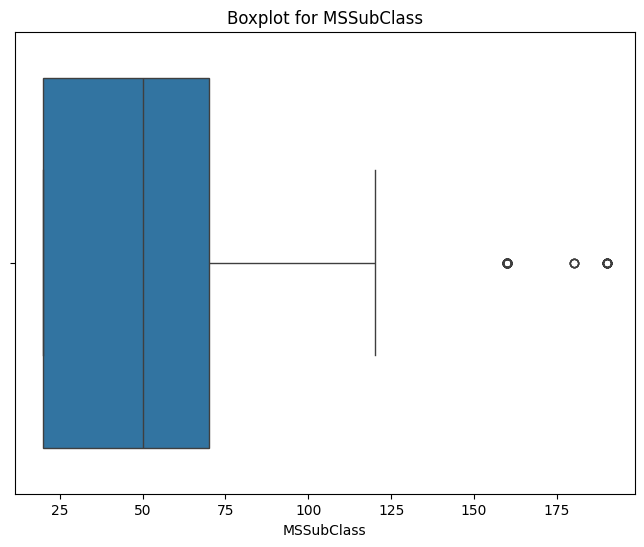

Outliers in column MSSubClass : 3      160
11     160
24     190
48     160
54     160
      ... 
861    160
867    190
910    190
914    160
915    160
Name: MSSubClass, Length: 72, dtype: int64


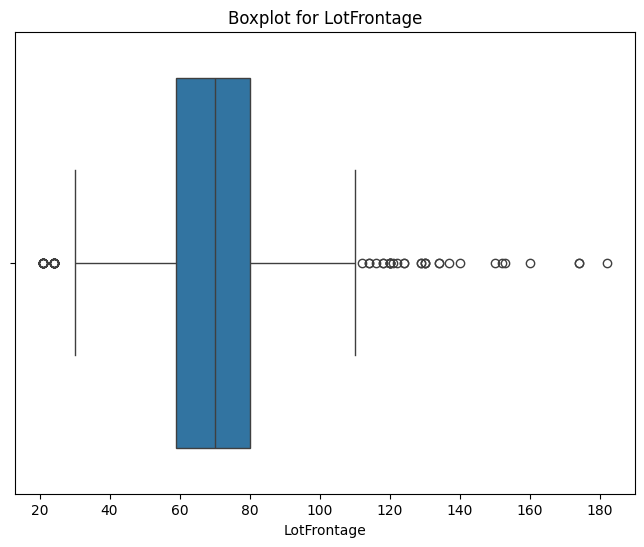

Outliers in column LotFrontage : 5      112.0
11      21.0
40     130.0
54      24.0
58     137.0
72     129.0
80     129.0
87     182.0
104     24.0
112    160.0
115     24.0
142    130.0
189     24.0
245    140.0
257     24.0
260    124.0
283    150.0
295    130.0
296     21.0
302     21.0
323    120.0
326     21.0
330     24.0
357     21.0
362     21.0
376     24.0
392    124.0
443     21.0
446     24.0
454    114.0
459     21.0
464    122.0
466    121.0
494    120.0
525     21.0
540     24.0
573    114.0
582    174.0
586    152.0
594     21.0
618     24.0
632    134.0
636    174.0
654     24.0
656    118.0
675    134.0
717    120.0
719    120.0
736    118.0
753     24.0
761    153.0
787    116.0
792     21.0
797    120.0
836     21.0
847     24.0
860     24.0
861     21.0
915     24.0
Name: LotFrontage, dtype: float64


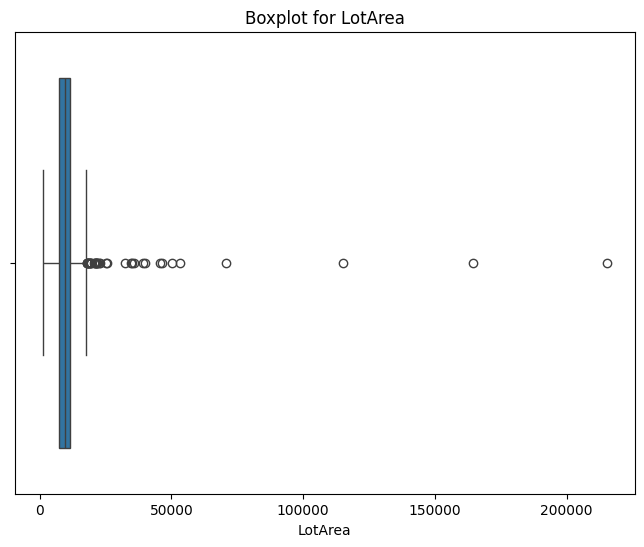

Outliers in column LotArea : 1       18800
24     164660
37      45600
40      40094
74      20896
96      19690
106     25339
117     39104
152     35133
198     21453
236     70761
245     19138
283    215245
323     18000
352     22420
367     21000
386     53107
422     20544
439     18386
484     21535
494     19296
503     17920
556     34650
591    115149
600     22950
636     25419
645     21872
656     35760
675     19378
681     21780
735     32463
764     50271
795     21930
834     18890
839     17871
871     46589
916     18450
Name: LotArea, dtype: int64


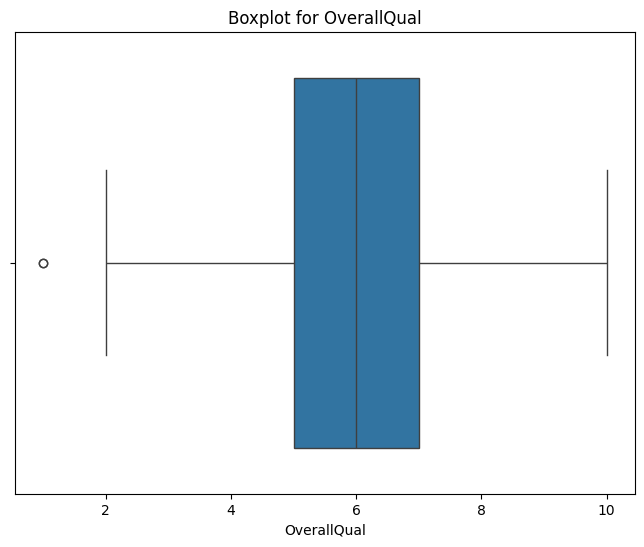

Outliers in column OverallQual : 113    1
580    1
Name: OverallQual, dtype: int64


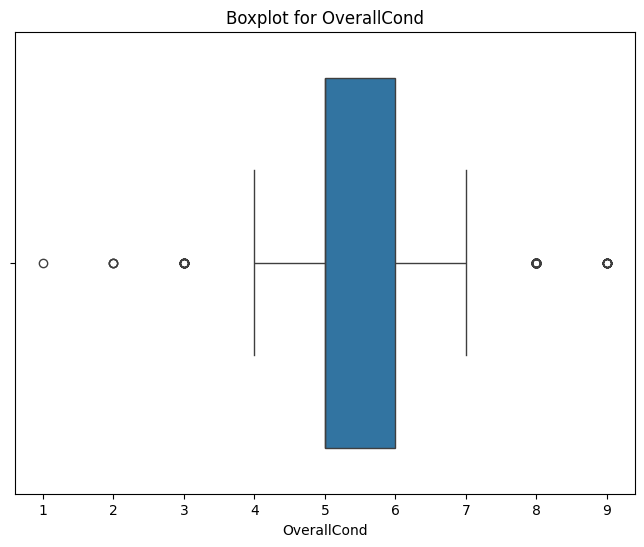

Outliers in column OverallCond : 11     8
13     3
14     3
16     8
17     9
      ..
865    9
894    8
896    8
910    9
920    8
Name: OverallCond, Length: 82, dtype: int64


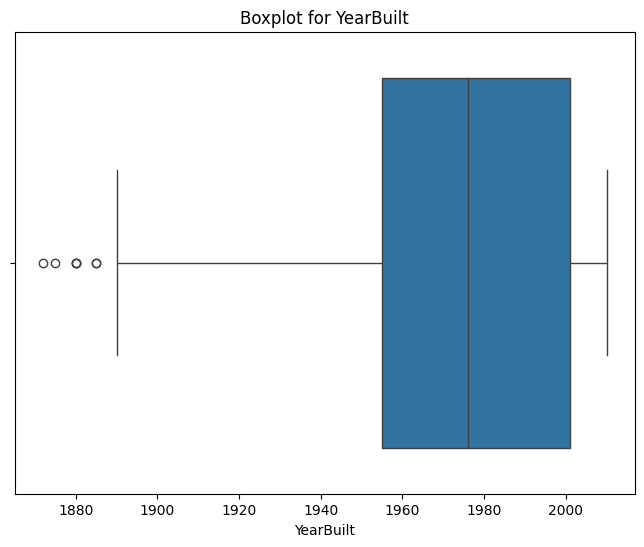

Outliers in column YearBuilt : 310    1885
322    1885
344    1880
439    1880
545    1872
642    1875
644    1880
Name: YearBuilt, dtype: int64


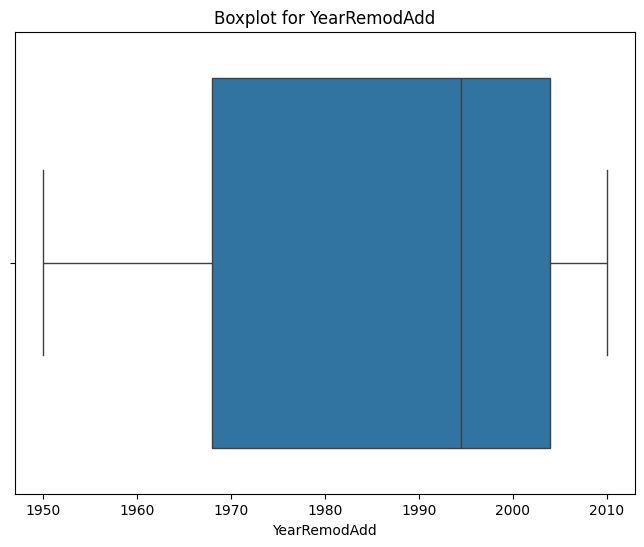

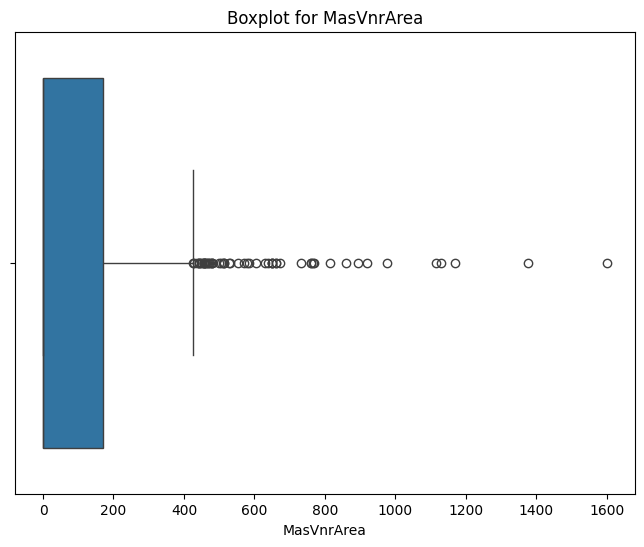

Outliers in column MasVnrArea : 2       860.0
11      510.0
28      554.0
40      762.0
44      975.0
48      513.0
90      513.0
105     472.0
107     766.0
149     731.0
159     651.0
174     500.0
189     456.0
246     466.0
257     456.0
328    1129.0
345     426.0
351     660.0
414     468.0
420     480.0
424     571.0
428     464.0
454     816.0
478     640.0
484    1170.0
486     760.0
496     459.0
518     630.0
520     428.0
554     442.0
567     650.0
579     448.0
582     506.0
593     768.0
628     584.0
633     579.0
656    1378.0
675     456.0
678     673.0
680     442.0
693     473.0
696    1115.0
714     438.0
778     443.0
780     530.0
793     452.0
796     660.0
800     921.0
807    1600.0
819     456.0
821     894.0
826     479.0
861     604.0
871     528.0
883     650.0
899     481.0
Name: MasVnrArea, dtype: float64


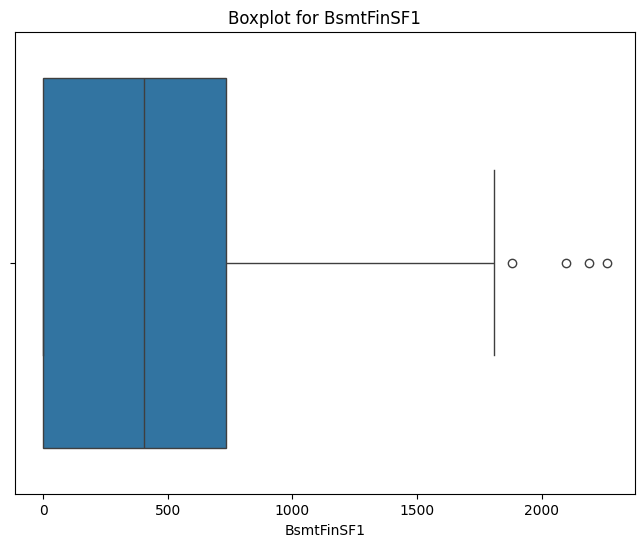

Outliers in column BsmtFinSF1 : 40     2260
112    2096
486    2188
696    1880
Name: BsmtFinSF1, dtype: int64


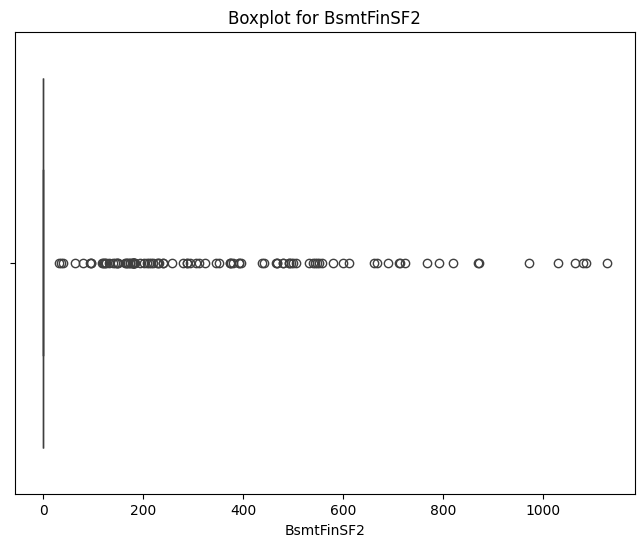

Outliers in column BsmtFinSF2 : 8      551
9      544
18     125
19     600
24     147
      ... 
880    491
885    228
889    163
914    215
916    723
Name: BsmtFinSF2, Length: 100, dtype: int64


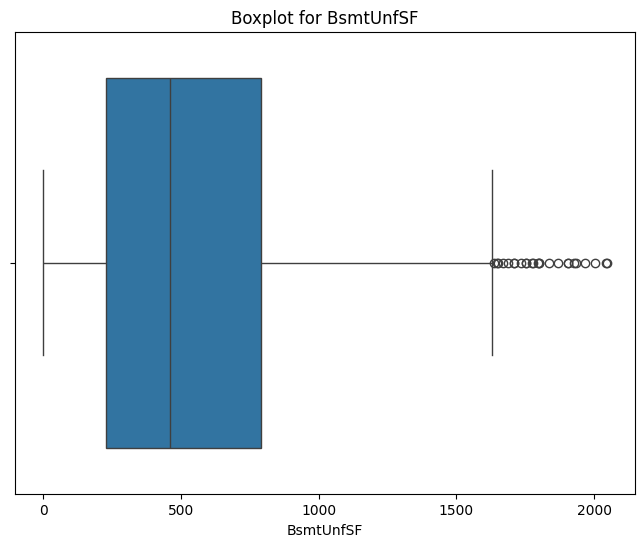

Outliers in column BsmtUnfSF : 2      1926
50     1652
53     2002
83     1638
93     1709
338    1907
394    2042
428    2046
437    1969
447    1752
464    1800
481    1777
488    1710
493    1753
520    1795
536    1869
550    1734
564    1670
630    1689
672    1935
680    1649
771    1905
793    1774
817    1800
900    1836
Name: BsmtUnfSF, dtype: int64


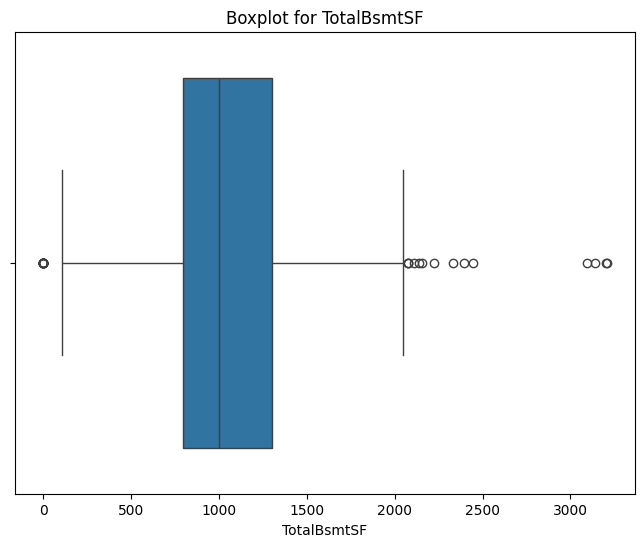

Outliers in column TotalBsmtSF : 14        0
31        0
40     3138
60     2076
61        0
74     2077
92        0
102       0
112    2396
113       0
170       0
174       0
200       0
208       0
210    3206
269       0
271       0
274       0
283    2136
306       0
351    2109
434       0
437    3200
454    2078
469    3094
472       0
484    2444
486    2330
528       0
538       0
584       0
589       0
687       0
696    2223
734       0
783    2158
799       0
820       0
879       0
886       0
Name: TotalBsmtSF, dtype: int64


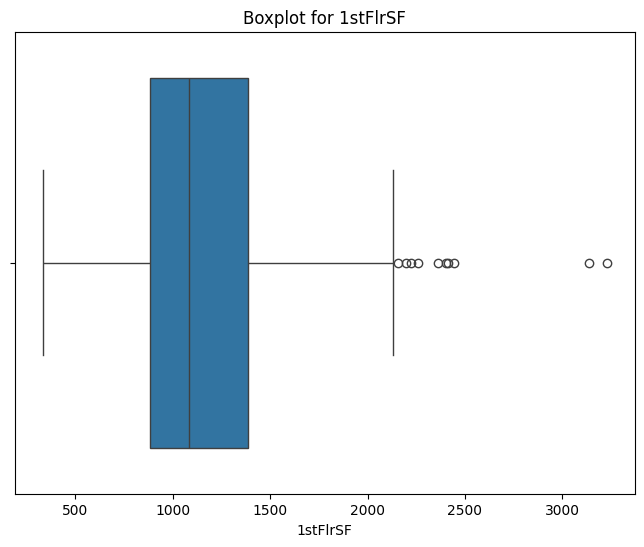

Outliers in column 1stFlrSF : 40     3138
112    2411
367    2259
437    3228
469    2402
484    2444
486    2364
513    2158
696    2223
783    2196
Name: 1stFlrSF, dtype: int64


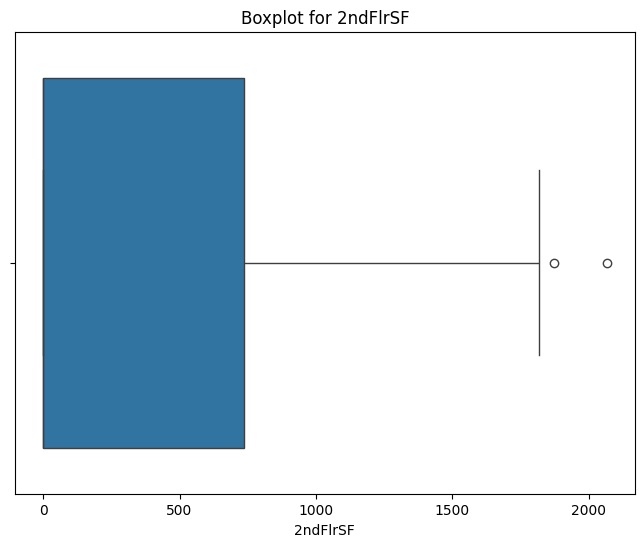

Outliers in column 2ndFlrSF : 112    2065
484    1872
Name: 2ndFlrSF, dtype: int64


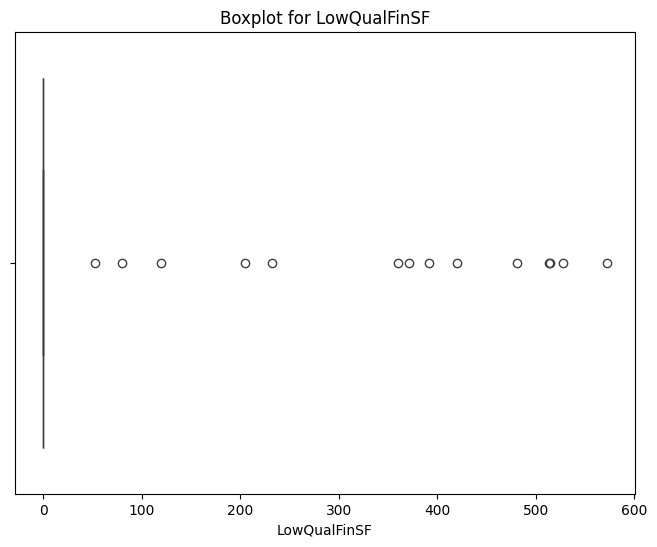

Outliers in column LowQualFinSF : 213    360
238    371
324    514
396    420
406    120
545    205
584     53
600    572
618     80
636    392
664    528
682    232
849    513
855    481
Name: LowQualFinSF, dtype: int64


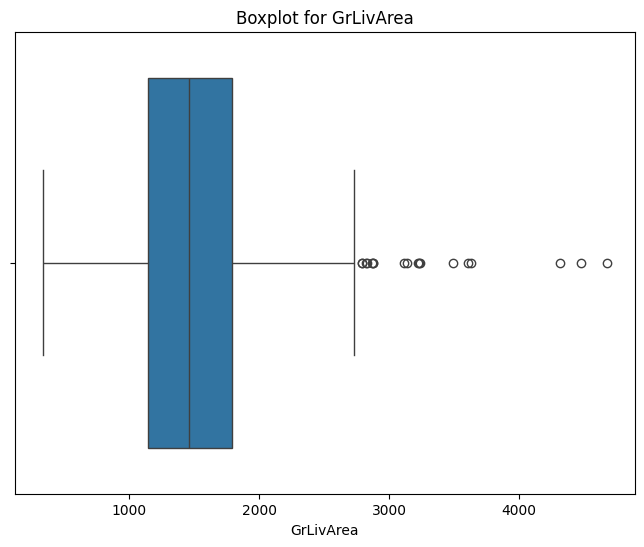

Outliers in column GrLivArea : 2      3140
40     4676
112    4476
139    2828
233    2872
332    2872
437    3228
439    3493
447    2868
484    4316
550    2822
582    2794
599    2792
600    3608
633    3238
636    3112
647    3222
656    3627
Name: GrLivArea, dtype: int64


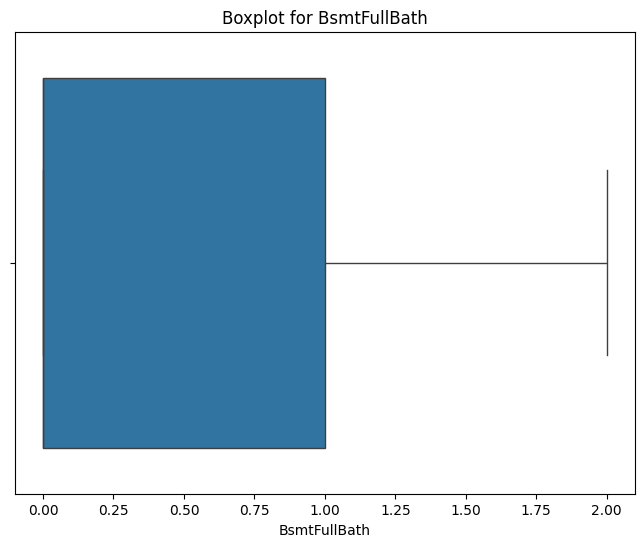

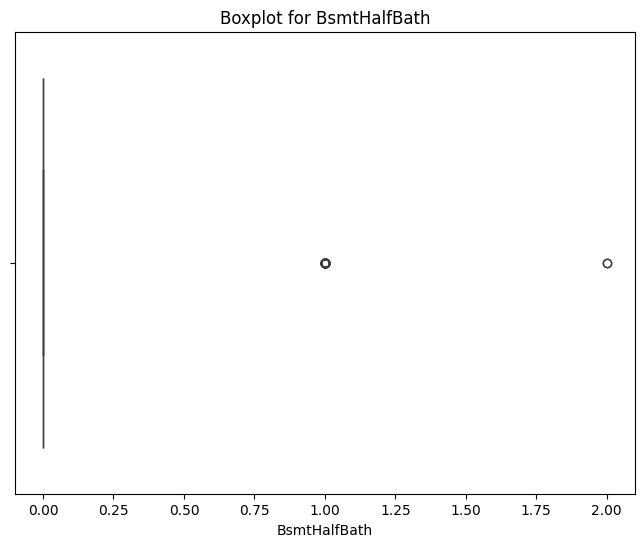

Outliers in column BsmtHalfBath : 7      1
33     1
45     1
49     1
73     1
99     1
163    1
171    1
195    1
197    1
203    1
204    1
214    1
253    1
258    1
268    1
299    1
303    1
311    1
313    1
346    1
373    1
425    1
436    1
443    1
450    2
455    1
460    1
461    1
484    1
498    1
508    1
553    1
555    1
565    1
567    1
568    1
575    1
605    2
619    1
636    1
645    1
654    1
657    1
716    1
757    1
781    1
789    1
794    1
805    1
828    1
862    1
896    1
899    1
Name: BsmtHalfBath, dtype: int64


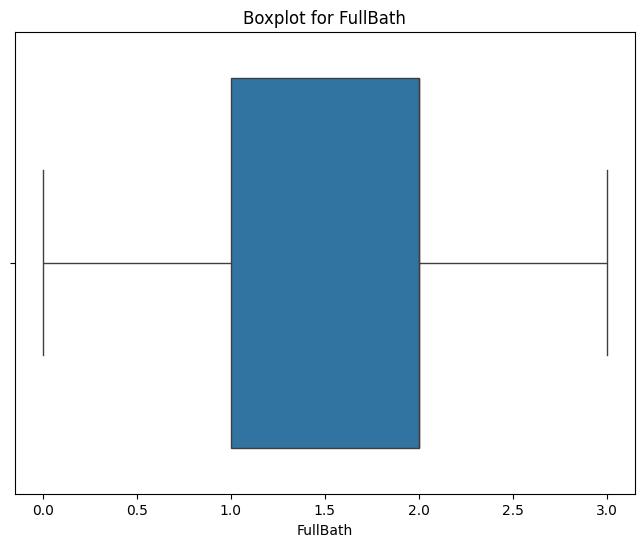

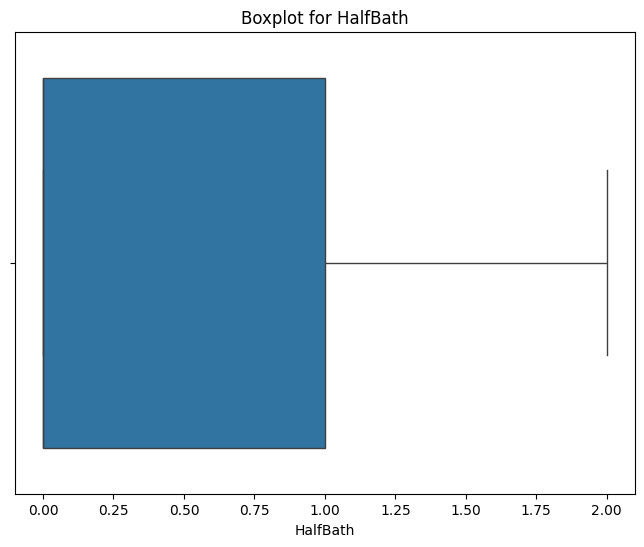

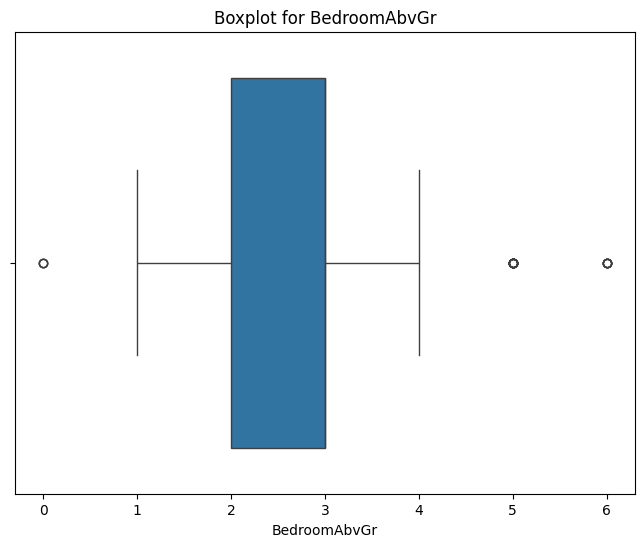

Outliers in column BedroomAbvGr : 37     5
75     5
91     5
133    0
148    5
173    6
195    5
226    5
238    5
269    6
338    5
344    5
385    5
388    0
599    5
609    5
631    5
647    5
702    6
764    0
805    6
817    6
855    5
926    6
Name: BedroomAbvGr, dtype: int64


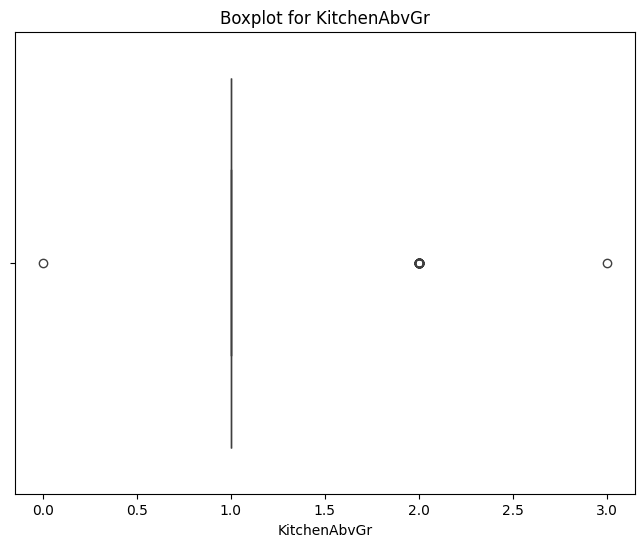

Outliers in column KitchenAbvGr : 39     2
56     2
133    2
170    2
173    2
178    2
200    2
208    2
265    2
266    2
269    2
290    2
306    2
310    2
338    2
385    2
388    2
409    2
453    2
519    2
528    2
532    2
576    2
605    0
609    2
687    2
763    2
788    2
791    2
805    2
816    2
817    2
820    2
828    2
829    3
834    2
868    2
887    2
907    2
910    2
926    2
Name: KitchenAbvGr, dtype: int64


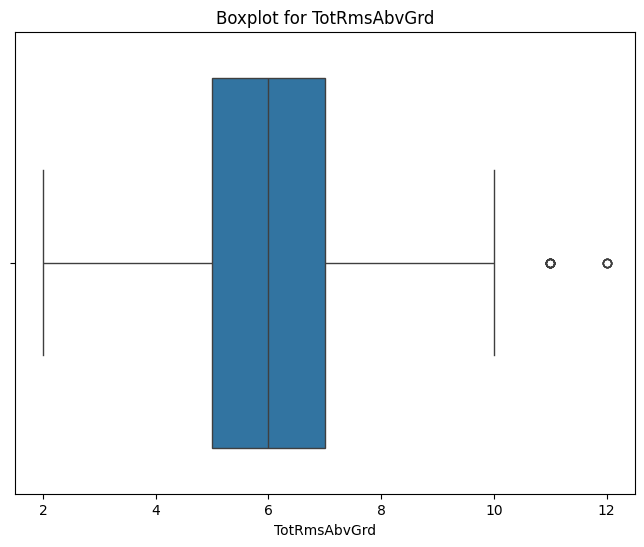

Outliers in column TotRmsAbvGrd : 2      11
40     11
139    11
163    11
233    11
269    12
310    11
447    11
486    11
550    12
583    11
600    12
647    11
805    12
816    11
834    12
Name: TotRmsAbvGrd, dtype: int64


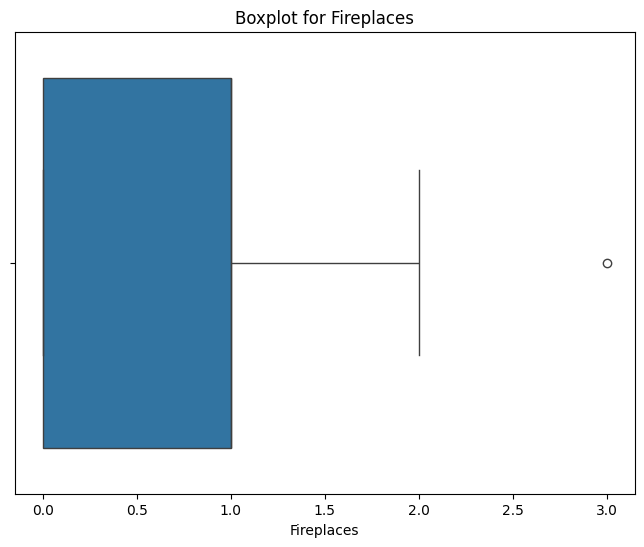

Outliers in column Fireplaces : 863    3
Name: Fireplaces, dtype: int64


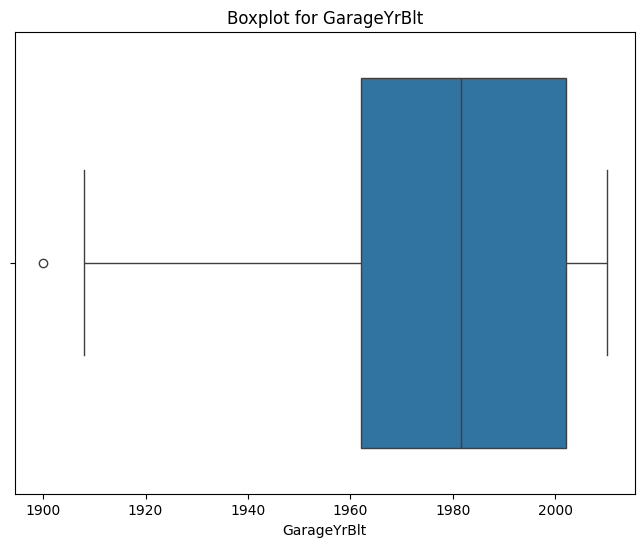

Outliers in column GarageYrBlt : 828    1900.0
Name: GarageYrBlt, dtype: float64


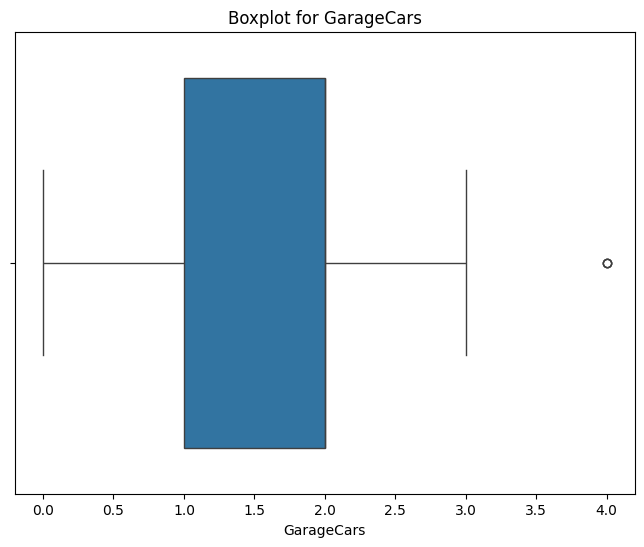

Outliers in column GarageCars : 343    4
735    4
805    4
Name: GarageCars, dtype: int64


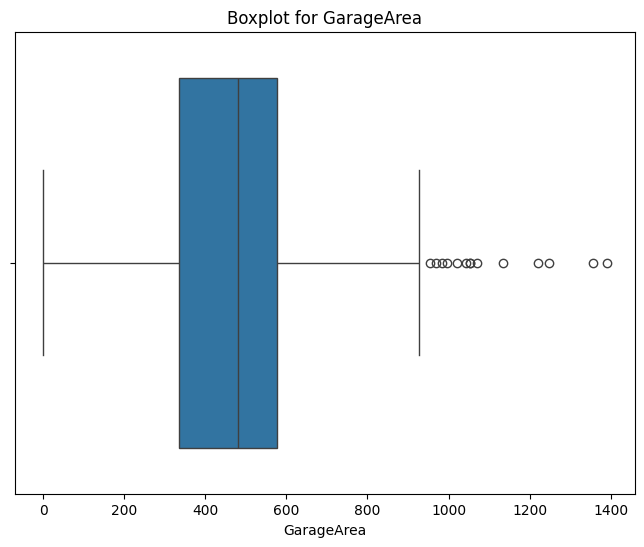

Outliers in column GarageArea : 74     1134
107    1052
139    1052
149    1069
152     995
159     983
323    1248
394    1390
454    1220
550    1020
630     954
735    1356
805     968
919    1043
Name: GarageArea, dtype: int64


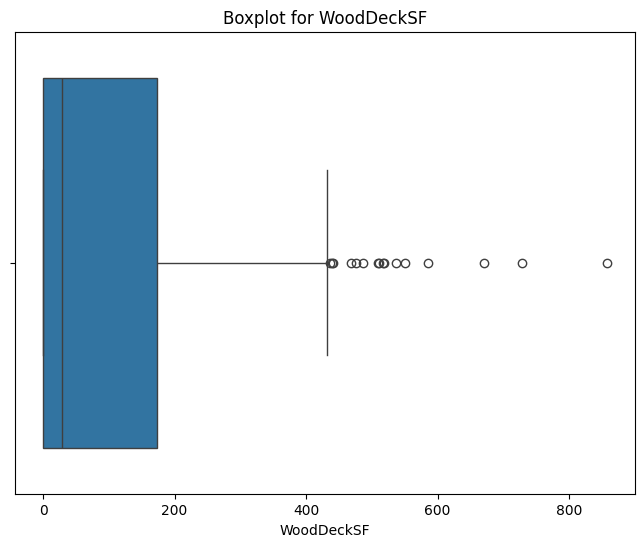

Outliers in column WoodDeckSF : 24     670
37     486
96     586
148    728
233    550
401    509
568    436
691    519
735    439
736    468
764    857
835    511
863    476
864    536
871    517
914    441
Name: WoodDeckSF, dtype: int64


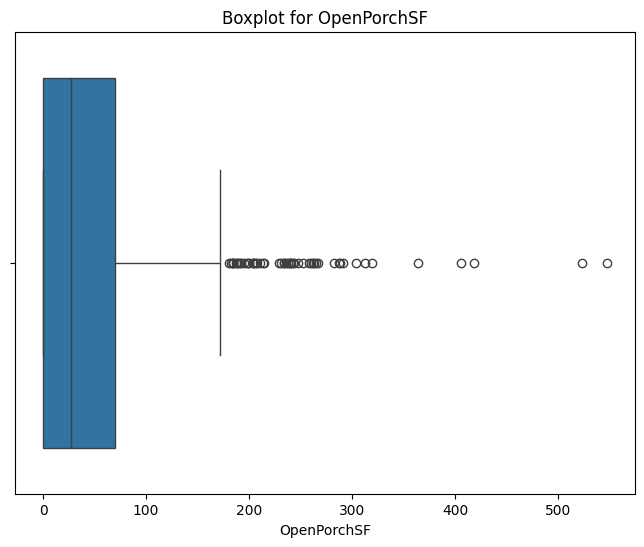

Outliers in column OpenPorchSF : 15     304
23     252
40     406
60     229
74     267
89     238
96     236
120    291
128    240
152    263
163    204
227    208
233    282
238    198
248    211
263    205
289    180
292    182
298    240
300    234
301    241
303    187
340    319
374    247
386    231
455    200
465    213
475    312
503    418
516    258
533    214
534    184
573    244
583    364
595    523
599    547
600    260
614    262
619    189
655    207
671    192
702    184
748    243
768    184
771    191
778    199
816    287
837    288
842    204
855    188
882    234
916    265
922    195
Name: OpenPorchSF, dtype: int64


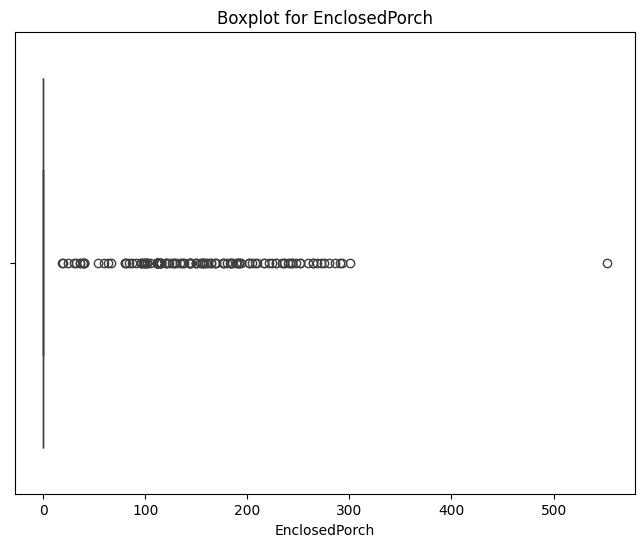

Outliers in column EnclosedPorch : 8      240
31     190
42      91
46     164
51      98
      ... 
912    102
920    150
924     64
928    144
933    150
Name: EnclosedPorch, Length: 128, dtype: int64


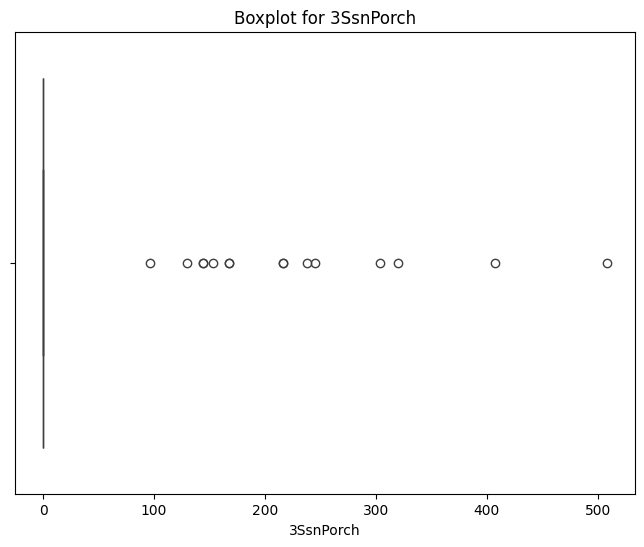

Outliers in column 3SsnPorch : 34     238
141    144
175    168
198    130
203     96
345    304
438    216
456    407
476    508
575    153
675    168
740    144
758    245
862    216
913    320
Name: 3SsnPorch, dtype: int64


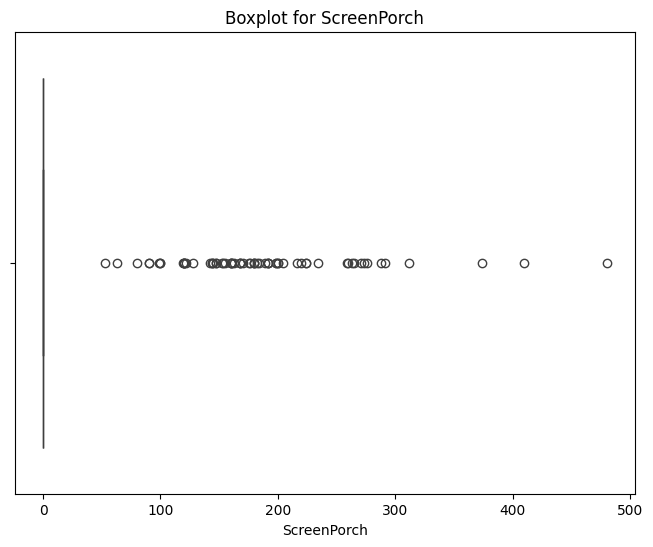

Outliers in column ScreenPorch : 22     180
32     128
37     175
57     160
95     161
      ... 
833    147
863    142
873    265
877     53
899    153
Name: ScreenPorch, Length: 67, dtype: int64


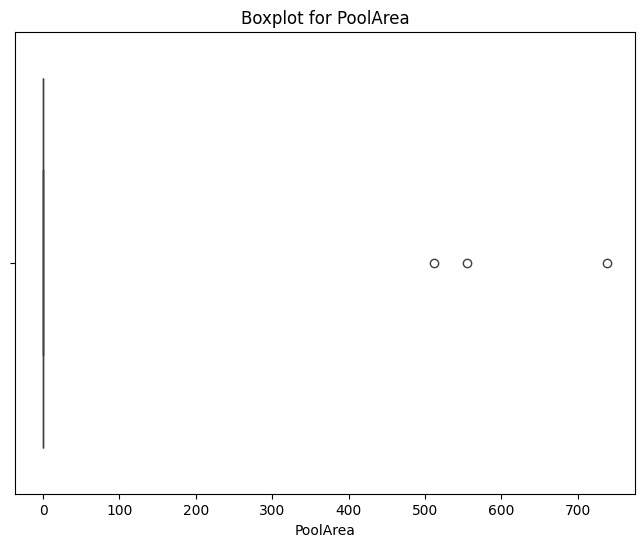

Outliers in column PoolArea : 96     738
112    555
636    512
Name: PoolArea, dtype: int64


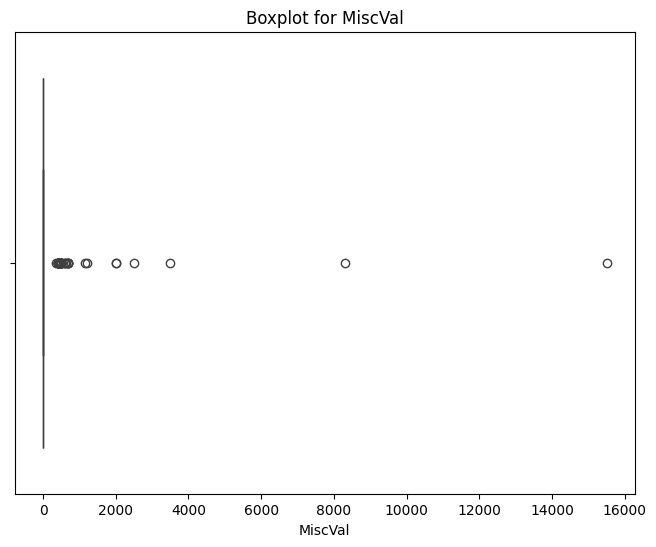

Outliers in column MiscVal : 7        500
24       700
98       620
108      450
133      600
134      500
166      400
176    15500
213      400
261      450
322      450
323      560
361      700
423     2000
505      480
528      500
568      500
599     1150
602      400
613      500
619      400
697      400
705      700
750      400
779      400
809     2500
820     3500
826     2000
834     8300
842      350
886     1200
898      600
903      450
905      500
913      700
Name: MiscVal, dtype: int64


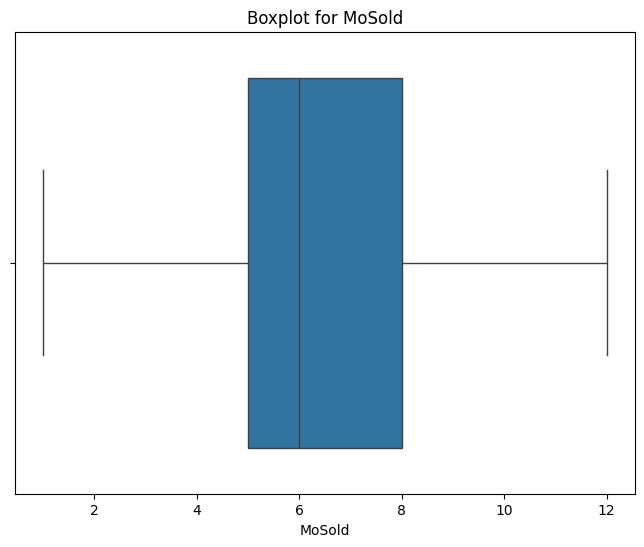

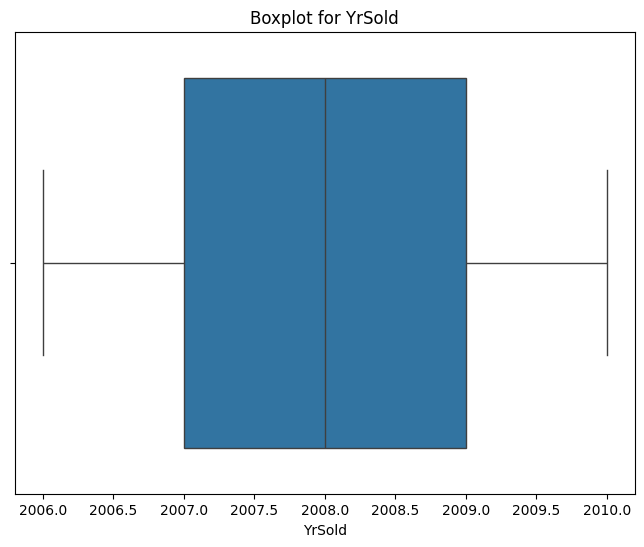

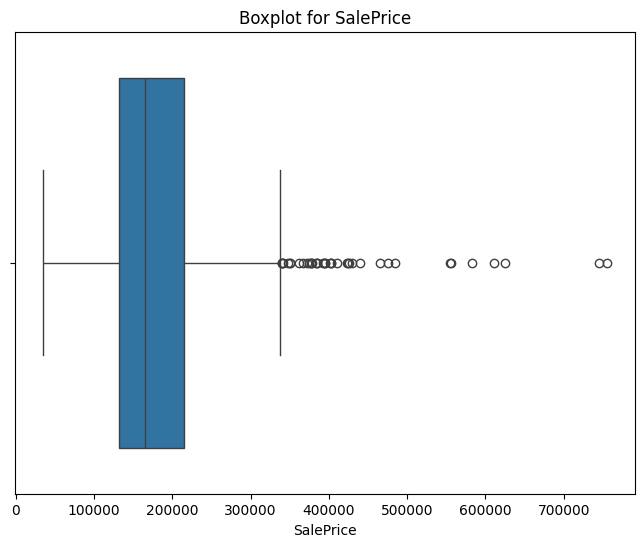

Outliers in column SalePrice : 2      485000
53     378500
60     465000
74     423000
107    367294
109    426000
112    745000
139    424870
149    340000
159    341000
246    361919
249    394432
283    375000
286    339750
345    394617
351    350000
410    348000
428    372500
437    430000
447    556581
454    385000
469    555000
470    402861
484    755000
486    611657
533    340000
534    383970
550    582933
575    392500
582    403000
588    377426
600    475000
633    410000
649    440000
656    625000
672    395000
759    377500
764    385000
871    402000
931    350000
Name: SalePrice, dtype: int64


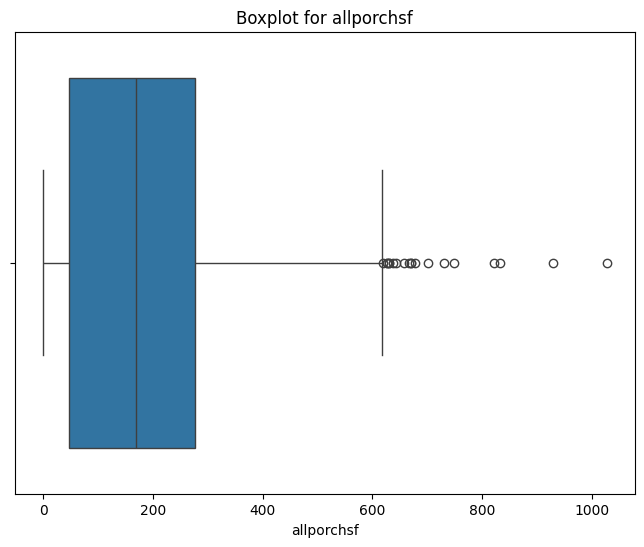

Outliers in column allporchsf : 24      670
34      678
37      701
96      822
148     748
159     620
233     832
401     644
437     630
503     730
595     638
599    1027
600     670
691     631
764     929
780     657
835     627
842     667
864     626
Name: allporchsf, dtype: int64


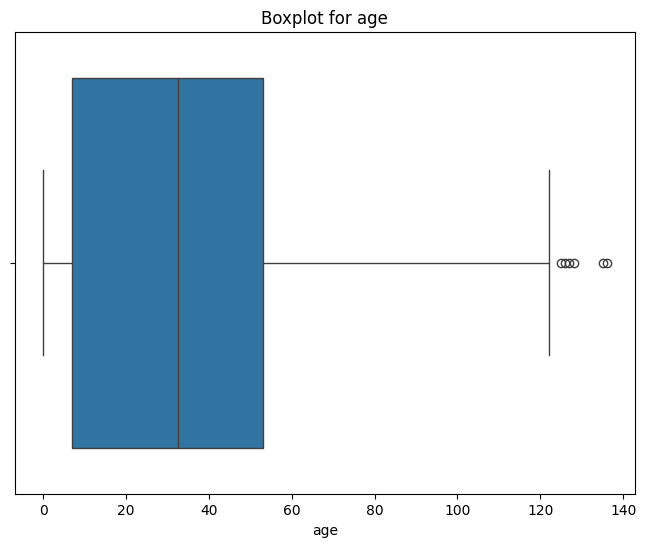

Outliers in column age : 310    125
344    127
439    128
545    136
642    135
644    126
Name: age, dtype: int64


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


outliers_dict = {}
for column in train_data.columns:
    if train_data[column].dtype != object:
        Q1 = train_data[column].quantile(0.25)
        Q3 = train_data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = train_data[(train_data[column] < lower_bound) | (train_data[column] > upper_bound)][column]
        outliers_dict[column] = outliers


for column, outliers in outliers_dict.items():
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=column, data=train_data)
    plt.title("Boxplot for " + column)
    plt.show()
    if not outliers.empty:
        print("Outliers in column", column, ":", outliers)


In [ ]:
train_c = train_data.select_dtypes(include='object')
train_c  = train_data.columns
train_la = train_data[train_c]
train_la.shape

(934, 83)

In [ ]:
train_data[train_c].head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   142          20       RL         78.0    11645   Pave   NaN      Reg   
1   365          60       RL          NaN    18800   Pave   NaN      IR1   
2   799          60       RL        104.0    13518   Pave   NaN      Reg   
3   976         160       FV          NaN     2651   Pave   NaN      Reg   
4  1158         120       RL         34.0     5001   Pave   NaN      IR1   

  LandContour Utilities  ... Fence MiscFeature MiscVal MoSold YrSold SaleType  \
0         Lvl    AllPub  ...   NaN         NaN       0      1   2006       WD   
1         Lvl    AllPub  ...   NaN         NaN       0      7   2006       WD   
2         Lvl    AllPub  ...   NaN         NaN       0      7   2009      New   
3         Lvl    AllPub  ...   NaN         NaN       0      4   2006       WD   
4         Lvl    AllPub  ...   NaN         NaN       0      7   2009       WD   

  SaleCondition  SalePrice  allporchsf  age  
0        Normal     260000         184    1  
1        Normal     190000         417   30  
2       Partial     485000         222    1  
3        Normal     165000         203    6  
4        Normal     230000         234    2  

[5 rows x 83 columns]

In [ ]:
for col in train_data[train_c].columns:
  print(col, ":", len(train_data[col].unique()),"Labels")

Id : 934 Labels
MSSubClass : 15 Labels
MSZoning : 5 Labels
LotFrontage : 99 Labels
LotArea : 743 Labels
Street : 2 Labels
Alley : 3 Labels
LotShape : 4 Labels
LandContour : 4 Labels
Utilities : 1 Labels
LotConfig : 5 Labels
LandSlope : 3 Labels
Neighborhood : 25 Labels
Condition1 : 9 Labels
Condition2 : 6 Labels
BldgType : 5 Labels
HouseStyle : 8 Labels
OverallQual : 10 Labels
OverallCond : 9 Labels
YearBuilt : 103 Labels
YearRemodAdd : 61 Labels
RoofStyle : 6 Labels
RoofMatl : 6 Labels
Exterior1st : 13 Labels
Exterior2nd : 14 Labels
MasVnrType : 4 Labels
MasVnrArea : 252 Labels
ExterQual : 4 Labels
ExterCond : 5 Labels
Foundation : 6 Labels
BsmtQual : 5 Labels
BsmtCond : 5 Labels
BsmtExposure : 5 Labels
BsmtFinType1 : 7 Labels
BsmtFinSF1 : 483 Labels
BsmtFinType2 : 7 Labels
BsmtFinSF2 : 91 Labels
BsmtUnfSF : 592 Labels
TotalBsmtSF : 555 Labels
Heating : 6 Labels
HeatingQC : 5 Labels
CentralAir : 2 Labels
Electrical : 5 Labels
1stFlrSF : 580 Labels
2ndFlrSF : 307 Labels
LowQualFinSF : 

In [ ]:
import pandas as pd

# Example DataFrame creation for testing (replace with your actual data loading)
train_la = pd.DataFrame({
    'Id': [1, 2, 3],
    'LotFrontage': [80, 70, 60],
    'LotArea': [8500, 9000, 9500],
    'OverallQual': [7, 6, 8],
    'OverallCond': [5, 7, 6],
    'YearBuilt': [2000, 1995, 2010],
    'YearRemodAdd': [2005, 1995, 2012],
    'MasVnrArea': [100, 150, 200]
})

test_la = pd.DataFrame({
    'Id': [4, 5, 6],
    'LotFrontage': [75, 65, 55],
    'LotArea': [8700, 9200, 9700],
    'OverallQual': [8, 5, 7],
    'OverallCond': [6, 7, 5],
    'YearBuilt': [1998, 2001, 2011],
    'YearRemodAdd': [2003, 2005, 2015],
    'MasVnrArea': [120, 130, 180]
})

# Columns to drop
drop_list = ['Alley', 'MasVnrType']

# Check if the columns exist in the DataFrame before dropping
train_la = train_la.drop(columns=[col for col in drop_list if col in train_la.columns], errors='ignore')
test_la = test_la.drop(columns=[col for col in drop_list if col in test_la.columns], errors='ignore')

print(train_la.shape)
print(test_la.shape)


(3, 8)
(3, 8)


In [ ]:


# Categorical columns
categorical_columns = ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
    'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
    'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual',
    'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
    'BsmtFinType2', 'Heating', 'HeatingQC']

# Check for null values in the categorical columns
print("Null values in train categorical columns:")
print(train_data[categorical_columns].isnull().sum())


Null values in train categorical columns:
MSSubClass       0
MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual        26
BsmtCond        26
BsmtExposure    26
BsmtFinType1    26
BsmtFinType2    27
Heating          0
HeatingQC        0
dtype: int64


### create new df for testing

In [ ]:
# create new df
new_df = train_data.copy()
new_df.shape

(934, 83)

### null values

In [ ]:
# some columns with zero that indicat there is no feature
# replace the zeros with none

columns_with_zero = ['allporchsf', 'GarageArea', 'WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']

new_df[columns_with_zero] = new_df[columns_with_zero].replace(0, np.nan)

In [ ]:
# count the null values

columns = numerical_columns + categorical_columns

missing_values = new_df[columns].isnull().sum().sort_values(ascending=False)

print(missing_values)

PoolArea         931
3SsnPorch        919
MiscVal          899
ScreenPorch      867
EnclosedPorch    806
WoodDeckSF       462
OpenPorchSF      406
allporchsf       158
GarageArea        50
BsmtFinType2      27
BsmtQual          26
BsmtCond          26
BsmtExposure      26
BsmtFinType1      26
RoofMatl           0
Exterior2nd        0
Exterior1st        0
RoofStyle          0
GarageCars         0
ExterQual          0
ExterCond          0
Foundation         0
BldgType           0
Heating            0
HouseStyle         0
LotConfig          0
Condition2         0
Condition1         0
Neighborhood       0
LandSlope          0
Utilities          0
LandContour        0
LotShape           0
Street             0
MSZoning           0
MSSubClass         0
YearBuilt          0
SalePrice          0
YrSold             0
MoSold             0
HeatingQC          0
dtype: int64


### fill none

In [ ]:
# fill none with the mean for numerical

new_df[numerical_columns] = new_df[numerical_columns].fillna(new_df[numerical_columns].mean())

# fill null with the mean for categorical

for column in categorical_columns:
    new_df[column] = new_df[column].fillna(new_df[column].mode()[0])


### outliers

In [ ]:
numerical_columns

['GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'YearBuilt',
 'allporchsf']

### drop columns

In [ ]:
# drop columns
# before the removing of the outliers

columns_toDrop=['PoolQC', 'PoolArea', 'MiscVal', 'MiscFeature', '3SsnPorch',
                'ScreenPorch', 'EnclosedPorch', 'Fence', 'WoodDeckSF', 'OpenPorchSF'
                ,'MoSold', 'YrSold']

# drop columns from the train data
train_data.drop(columns=columns_toDrop, axis=1, inplace=True)

# drop columns from the test data
#test_data.drop(columns=columns_toDrop, axis=1, inplace=True)

In [ ]:
# edit columns lists after drop features

columns = list(set(columns) - set(columns_toDrop))
numerical_columns = list(set(numerical_columns) - set(columns_toDrop))
categorical_columns = list(set(categorical_columns) - set(columns_toDrop))

In [ ]:
# check for outliers

for column in numerical_columns:
    Q1 = train_data[column].quantile(0.25)
    Q3 = train_data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = train_data[(train_data[column] < lower_bound) | (train_data[column] > upper_bound)]
    print(f"the number of outliers in {column}: ",outliers.shape[0])

the number of outliers in GarageArea:  14
the number of outliers in allporchsf:  19
the number of outliers in GarageCars:  3
the number of outliers in YearBuilt:  7
the number of outliers in SalePrice:  40


In [ ]:
# remove the ouliers from the new df

for column in numerical_columns:
    Q1 = new_df[column].quantile(0.25)
    Q3 = new_df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    new_df = new_df[(new_df[column] >= lower_bound) & (new_df[column] <= upper_bound)]

In [ ]:
new_df.shape

(804, 83)

In [ ]:
train_data.shape

(934, 71)

### corr

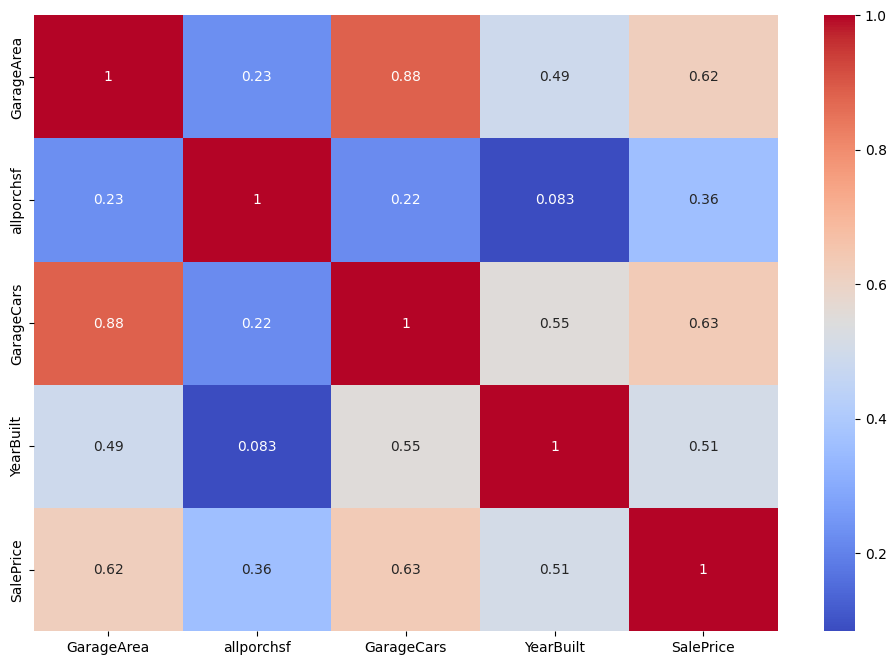

In [ ]:
plt.figure(figsize = (12,8))

sns.heatmap(train_data[numerical_columns].corr(), annot=True,cmap="coolwarm")
plt.show()

In [ ]:


missing_values = train_data[list(set(columns) - set(columns_toDrop))].isnull().sum().sort_values(ascending=False)

print(missing_values)

BsmtFinType2    27
BsmtQual        26
BsmtExposure    26
BsmtFinType1    26
BsmtCond        26
Street           0
Condition2       0
Neighborhood     0
Foundation       0
Condition1       0
ExterQual        0
HeatingQC        0
LandContour      0
Exterior2nd      0
MSSubClass       0
RoofStyle        0
Heating          0
GarageArea       0
LandSlope        0
BldgType         0
GarageCars       0
ExterCond        0
Utilities        0
SalePrice        0
YearBuilt        0
HouseStyle       0
Exterior1st      0
RoofMatl         0
LotShape         0
allporchsf       0
MSZoning         0
LotConfig        0
dtype: int64


### GarageQual or GarageCond

In [ ]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(train_data['GarageQual'], train_data['GarageCond'])

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-square Statistic:", chi2)
print("p-value:", p_value)
print("Degrees of Freedom:", dof)

contingency_table

Chi-square Statistic: 871.7093750127707
p-value: 6.811471121318232e-179
Degrees of Freedom: 12


GarageCond  Ex  Fa  Gd  Po   TA
GarageQual                     
Ex           2   0   0   0    1
Fa           0   9   0   2   16
Gd           0   0   2   0    4
TA           0   9   5   0  834

In [ ]:
print(train_data['GarageQual'].value_counts())
print(train_data['GarageCond'].value_counts())

GarageQual
TA    848
Fa     27
Gd      6
Ex      3
Name: count, dtype: int64
GarageCond
TA    855
Fa     18
Gd      7
Ex      2
Po      2
Name: count, dtype: int64


###  GarageArea or GarageCars

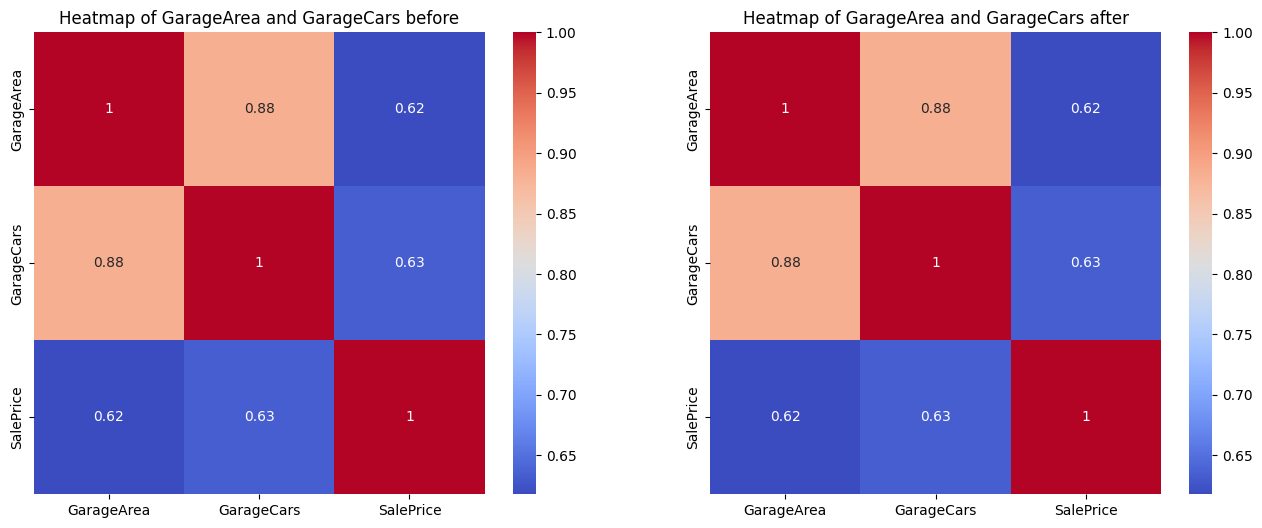

In [ ]:
# the correlation before filling the none = 0.88
# after = 0.68

train_data_before = pd.read_csv("train.csv")

col = ['GarageArea', 'GarageCars','SalePrice']


fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(train_data_before[col].corr(), annot=True, cmap="coolwarm", ax=axes[0])
axes[0].set_title('Heatmap of GarageArea and GarageCars before')

sns.heatmap(train_data[col].corr(), annot=True, cmap="coolwarm", ax=axes[1])
axes[1].set_title('Heatmap of GarageArea and GarageCars after')

plt.show()

In [ ]:
# drop the GarageArea less corr with the target than GarageCars

# drop columns from the train data
train_data.drop(columns=['GarageArea'], axis=1, inplace=True)

# drop columns from the test data
#test_data.drop(columns=['GarageArea'], axis=1, inplace=True)

# Final preprocessing

<Axes: >

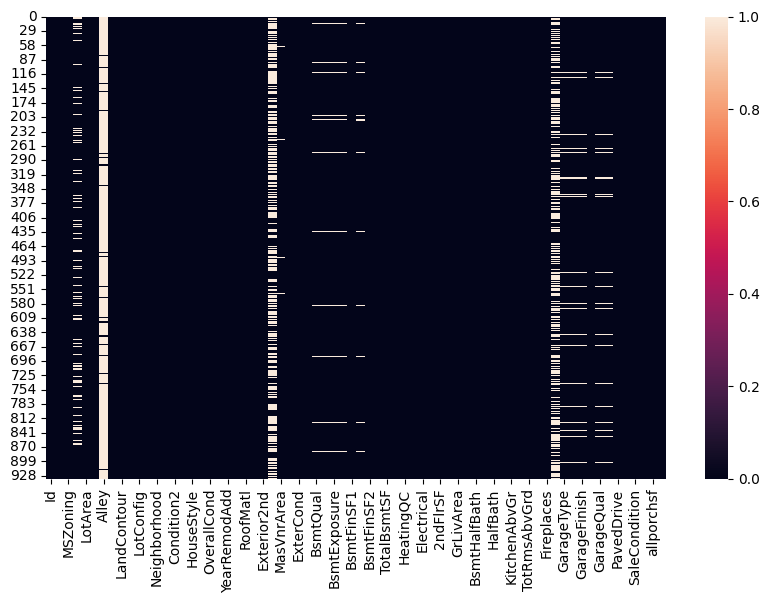

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(train_data.isna())

In [ ]:
train_data = train_data.drop(['LotFrontage', 'Alley', 'MasVnrType', 'FireplaceQu'], axis=1)
test_data = test_data.drop(['LotFrontage', 'Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)

In [ ]:
column_filled = train_data.isna().sum()[train_data.isna().sum()>0].index

In [ ]:
column_filled

Index(['MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')

In [ ]:
train_data[column_filled]

MasVnrArea BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  \
0           0.0       Gd       TA           Av          GLQ          Unf   
1         120.0       Gd       TA           Mn          GLQ          Unf   
2         860.0       Ex       TA           No          Unf          Unf   
3           0.0       Gd       TA           No          GLQ          Unf   
4         166.0       Gd       TA           No          GLQ          Unf   
..          ...      ...      ...          ...          ...          ...   
929         0.0       Gd       TA           No          ALQ          Unf   
930         0.0       Gd       TA           No          ALQ          Unf   
931       216.0       Ex       TA           No          GLQ          Unf   
932        70.0       Ex       TA           Gd          GLQ          Unf   
933         0.0       TA       TA           Av          Unf          Unf   

    Electrical GarageType  GarageYrBlt GarageFinish GarageQual GarageCond  
0        SBrkr     Attchd       2005.0          Fin         TA         TA  
1        SBrkr     Attchd       1976.0          Fin         TA         TA  
2        SBrkr    BuiltIn       2009.0          Fin         TA         TA  
3        SBrkr     Detchd       2000.0          Unf         TA         TA  
4        SBrkr     Attchd       2008.0          RFn         TA         TA  
..         ...        ...          ...          ...        ...        ...  
929      SBrkr     Attchd       1992.0          RFn         TA         TA  
930      SBrkr        NaN          NaN          NaN        NaN        NaN  
931      SBrkr     Attchd       2004.0          Fin         TA         TA  
932      SBrkr     Attchd       2008.0          Fin         TA         TA  
933      SBrkr     Attchd       1953.0          Unf         TA         TA  

[934 rows x 12 columns]

In [ ]:
train_data['MasVnrArea'].fillna(train_data['MasVnrArea'].mode()[0], inplace=True)
train_data['GarageYrBlt'].fillna(train_data['GarageYrBlt'].mode()[0], inplace=True)

for i in column_filled:
    train_data[i].fillna(train_data[i].mode()[0], inplace=True)

<Axes: >

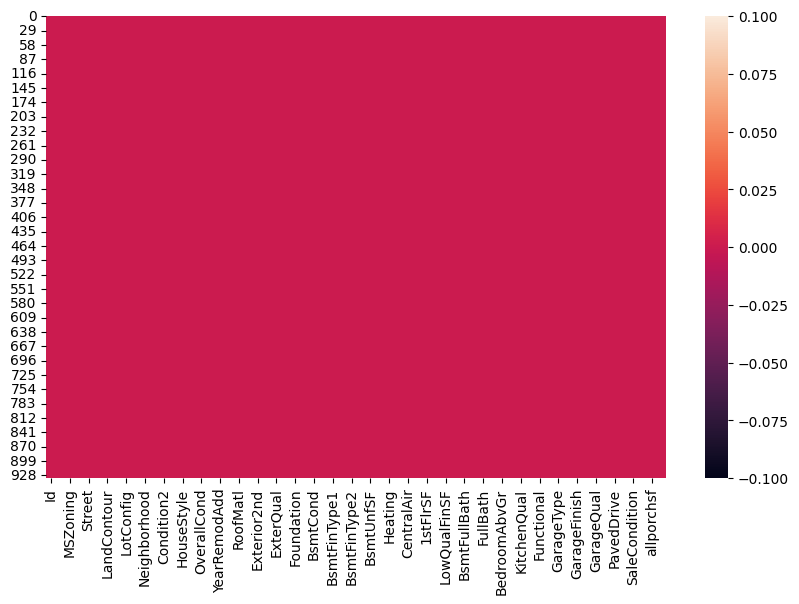

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(train_data.isna())

<Axes: >

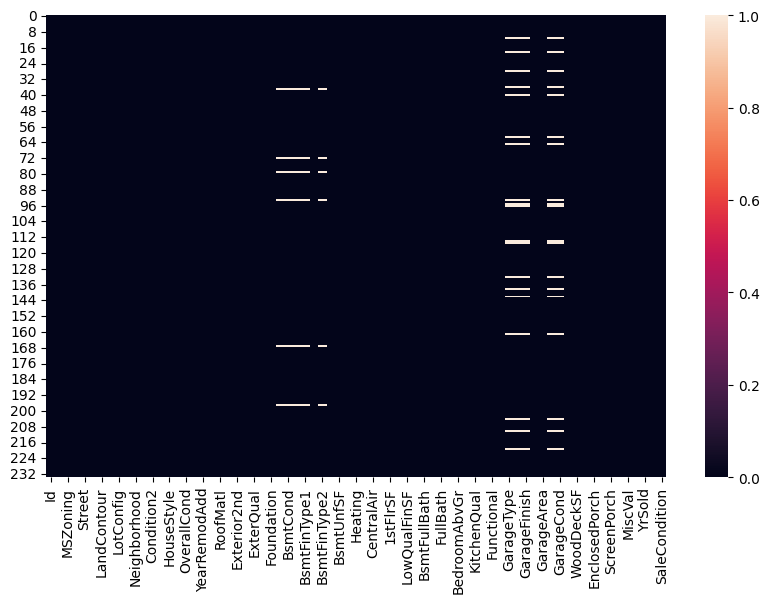

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(test_data.isna())

In [ ]:
column_filled_test = test_data.isna().sum()[test_data.isna().sum()>0].index

In [ ]:
column_filled_test

Index(['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'GarageCond'],
      dtype='object')

In [ ]:
for i in column_filled_test:
    test_data[i].fillna(test_data[i].mode()[0], inplace=True)

<Axes: >

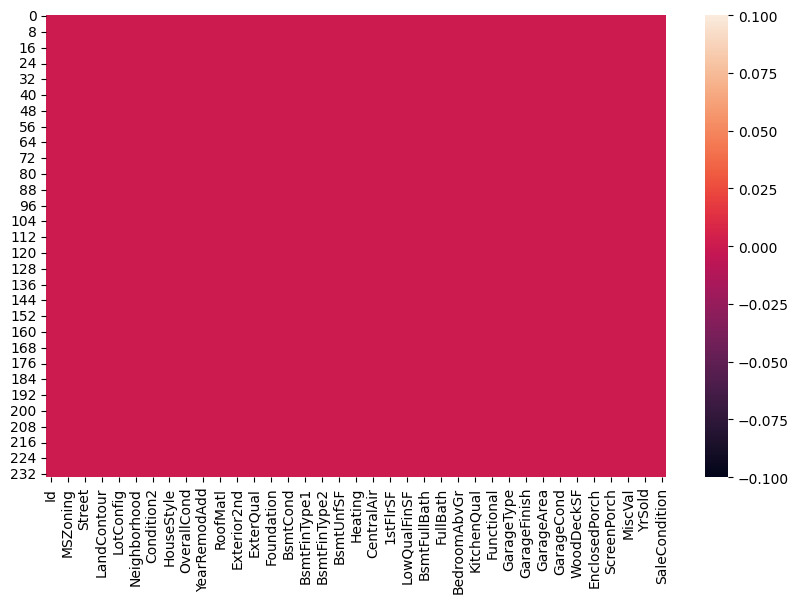

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(test_data.isna())